### 1. Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Import training data set, create data frame and displaying first five row of data frame 

In [2]:
df_train = pd.read_excel(r'E:/DATA TRAINED/Data/Project Data/DSData-master/DSData-master/Flight Price Prediction/Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 3. Explore Data Frame

#### a). Data frame shape

In [3]:
df_train.shape

(10683, 11)

##### Outcome : There are total 10683 rows and 11 columns in the data frame.

#### b). Data frame info

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### Outcome : 
* 10 Out of 11 columns in the data frame are type of object. The columns are : Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info.
* 01 Out of 11 column in the data frame are type of int. The column is : Price.
* Route and Total_Stops contain null values.
* Rest column do not have null values.

#### c). Cross checking the null values

In [5]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### Outcome : Route and Total_Stops contain 1 null values

#### d). Checking the uniqueness of value in each column

In [6]:
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

##### Outcome : Above are the count of unique values in each column.

##### e). Checking the values in each column

In [7]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

##### Outcome : Jet Airways & Jet Airways Business are Jet Airways, Multiple carriers & Multiple carriers Premium economy are Multiple carriers, Vistara & Vistara Premium economy are Vistara type of same airline so merge them then  Looklike fine and usefful for model. 

In [8]:
df_train['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [9]:
df_train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [10]:
df_train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

##### Outcome : Delhi and New Delhi are same merge them then Looklike fine and usefful for model.

In [11]:
df_train['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → UDR → DEL → HYD             1
CCU → IXZ → MAA → BLR             1
BOM → JDH → JAI → DEL → HYD       1
CCU → RPR → HYD → BLR             1
CCU → IXA → BLR                   1
Name: Route, Length: 128, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [12]:
df_train['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
04:15      1
22:25      1
12:45      1
04:50      1
12:05      1
Name: Dep_Time, Length: 222, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [13]:
df_train['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
02:45 22 May      1
07:45 10 Jun      1
16:15 25 Mar      1
01:10 22 Mar      1
22:10 16 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [14]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
41h 20m      1
42h 45m      1
37h 10m      1
36h 25m      1
47h          1
Name: Duration, Length: 368, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [15]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

##### Outcome : Looklike fine and usefful for model.

In [16]:
df_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

##### Outcome : No info and No Info are same ,2 Long layover and 1 Long Layover can be merge into Long Layover then Lookslike fine and useful for model.

In [17]:
df_train['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
16946      1
10783      1
14861      1
10759      1
4098       1
Name: Price, Length: 1870, dtype: int64

##### Outcome : Looklike fine and usefful for model.'Price' is our target as per problem statement.

### 4. Data Processing

#### a). Dealing with null values

In [18]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### Outcome : 'Route' and 'Total_Stops' both having null values and are of object type. So i am replacing with mode.

In [19]:
print('The mode of Route is :',df_train['Route'].mode()[0])
print('The mode of Total_Stops is :',df_train['Total_Stops'].mode()[0])

The mode of Route is : DEL → BOM → COK
The mode of Total_Stops is : 1 stop


In [20]:
df_train['Route'] = df_train['Route'].fillna(df_train['Route'].mode()[0])
df_train['Total_Stops'] = df_train['Total_Stops'].fillna(df_train['Total_Stops'].mode()[0])

In [21]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### b). Feature Extraction 

In [22]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

##### Outcome : Date_of_Journey,Arrival_Time,Dep_Time,Duration are of object type. For correctness i have to convert these into Datetime.

##### Decision : 
* I am going to convert Date_of_Journey,Arrival_Time,Dep_Time into datetime i.e. timestamp.
* From Date_of_Journey i am extracting day,month & year in separate column.
* Based on Arrival_Time,Dep_Time i am calculating the duration by taking the difference which give me output data as timedelta. After obtaining timedelta i will obtain data in seconds then convert these second into mintues by dividing 60,then convert it into hour by again dividing 60 or simply divide seconds by 3600.
* Then replace the final result into Duration.
* From Arrival_Time,Dep_Time i am extracting Hour & Minute in separate column. 

In [23]:
import datetime as dt

In [24]:
# Converting the data type
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'])
df_train['Arrival_Time'] = pd.to_datetime(df_train['Arrival_Time'])
df_train['Dep_Time'] = pd.to_datetime(df_train['Dep_Time'])

In [25]:
df_train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [26]:
# Extracting Day,Month & Year from Date_of_Journey

# Extracting Day
df_train['Journey_Day'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%y/').dt.day

# Extracting Month
df_train['Journey_Month'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%y/').dt.month

# Extracting Year
df_train['Journey_Year'] = pd.to_datetime(df_train['Date_of_Journey'],format='%d/%m/%y/').dt.year

In [27]:
# Dropping Date_of_Journey column
df_train.drop(columns='Date_of_Journey',axis=1,inplace=True)

In [28]:
# Dealing for Duration
time_delta = (df_train['Arrival_Time']-df_train['Dep_Time'])
time_delta_difference = []
for i in range(len(time_delta)):
    final_duration = time_delta.iloc[i].seconds/3600
    time_delta_difference.append(final_duration)

# Replacing the 'Duration' by result
df_train['Duration'] = time_delta_difference

In [29]:
# Extracting hours and minutes from 'Arrival_Time'

# Extracting hours 
df_train['Arrival_Hours'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour

# Extracting minutes
df_train['Arrival_Minutes'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

In [30]:
# Extracting hours and minutes from 'Dep_Time'

# Extracting hours 
df_train['Dep_Hours'] = pd.to_datetime(df_train['Dep_Time']).dt.hour

# Extracting minutes
df_train['Dep_Minutes'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

In [31]:
# Dropping Arrival_Time & Dep_Time
df_train.drop(columns=['Arrival_Time','Dep_Time'],axis=1,inplace=True)

#### c). Dealing for grouping

In [32]:
# Dealing in Airline
df_train['Airline'] = df_train['Airline'].replace('Jet Airways Business','Jet Airways') 
df_train['Airline'] = df_train['Airline'].replace('Multiple carriers Premium economy','Multiple carriers')
df_train['Airline'] = df_train['Airline'].replace('Vistara Premium economy','Vistara')

In [33]:
df_train['Airline'].value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

In [34]:
# Dealing in Destination
df_train['Destination'] = df_train['Destination'].replace('New Delhi','Delhi') 

In [35]:
# Dealing in Additional_Info 
df_train['Additional_Info'] = df_train['Additional_Info'].replace('No Info','No info')
df_train['Additional_Info'] = df_train['Additional_Info'].replace('1 Long layover','Long layover')
df_train['Additional_Info'] = df_train['Additional_Info'].replace('2 Long layover','Long layover')

In [36]:
df_train['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [37]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,6,9,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,5,12,2019,23,30,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,3,1,2019,21,35,16,50


In [38]:
df_train['Journey_Year'].value_counts()

2019    10683
Name: Journey_Year, dtype: int64

##### Outcome : Only one year which is 2019 so not useful for model. Drop it.

In [39]:
df_train.drop(columns='Journey_Year',axis=1,inplace=True)

### 5. Descriptive Statical Data

In [40]:
df_train.describe()

,Duration,Price,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,8.206754,9087.064121,12.682205,5.534775,13.348778,24.690630,12.490686,24.411214
std,6.387288,4611.359167,8.803701,2.987489,6.859125,16.506036,5.748650,18.767980
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.750000,5277.000000,5.000000,3.000000,8.000000,10.000000,8.000000,5.000000
50%,6.333333,8372.000000,6.000000,5.000000,14.000000,25.000000,11.000000,25.000000
75%,12.583333,12373.000000,21.000000,6.000000,19.000000,35.000000,18.000000,40.000000
max,23.916667,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


##### Outcome :
* From count all are equal so there is no null value now.
* mean is greater than 50 % in case of Duration, Price, Journey_Day, Journey_Month, Dep_Hours, Dep_Minutes i.e. right skew.
* mean is less than 50 % in case of Arrival_Hours, Arrival_Minutes i.e. left skew.
* difference between 75% and max is much so outliers is also there.

### 6. Data Visualization Of Individual Columns

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10683 non-null  object 
 4   Duration         10683 non-null  float64
 5   Total_Stops      10683 non-null  object 
 6   Additional_Info  10683 non-null  object 
 7   Price            10683 non-null  int64  
 8   Journey_Day      10683 non-null  int64  
 9   Journey_Month    10683 non-null  int64  
 10  Arrival_Hours    10683 non-null  int64  
 11  Arrival_Minutes  10683 non-null  int64  
 12  Dep_Hours        10683 non-null  int64  
 13  Dep_Minutes      10683 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 1.1+ MB


#### a). Visualization of continous column

In [42]:
# Selceting numerical column
df1 = df_train.select_dtypes(exclude='object')
df1

,Duration,Price,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,2.833333,3897,24,3,1,10,22,20
1,7.416667,7662,5,1,13,15,5,50
2,19.000000,13882,6,9,4,25,9,25
3,5.416667,6218,5,12,23,30,18,5
4,4.750000,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...
10678,2.500000,4107,4,9,22,25,19,55
10679,2.583333,4145,27,4,23,20,20,45
10680,3.000000,7229,27,4,11,20,8,20
10681,2.666667,12648,3,1,14,10,11,30


#### b). Visualization using dist plot

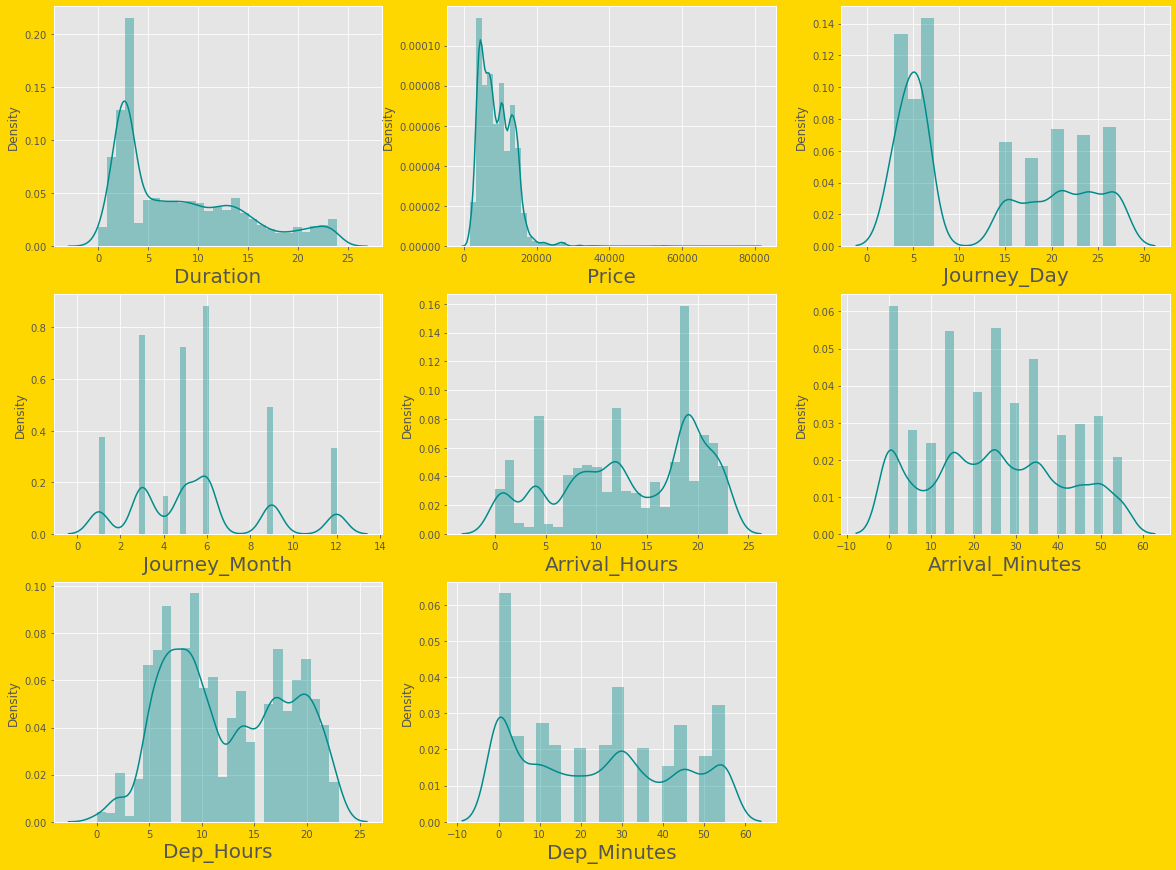

In [43]:
plt.figure(figsize=(20,15),facecolor='Gold')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.distplot(df1[column],color='DarkCyan')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show()    

#### c). Visualization using hist plot

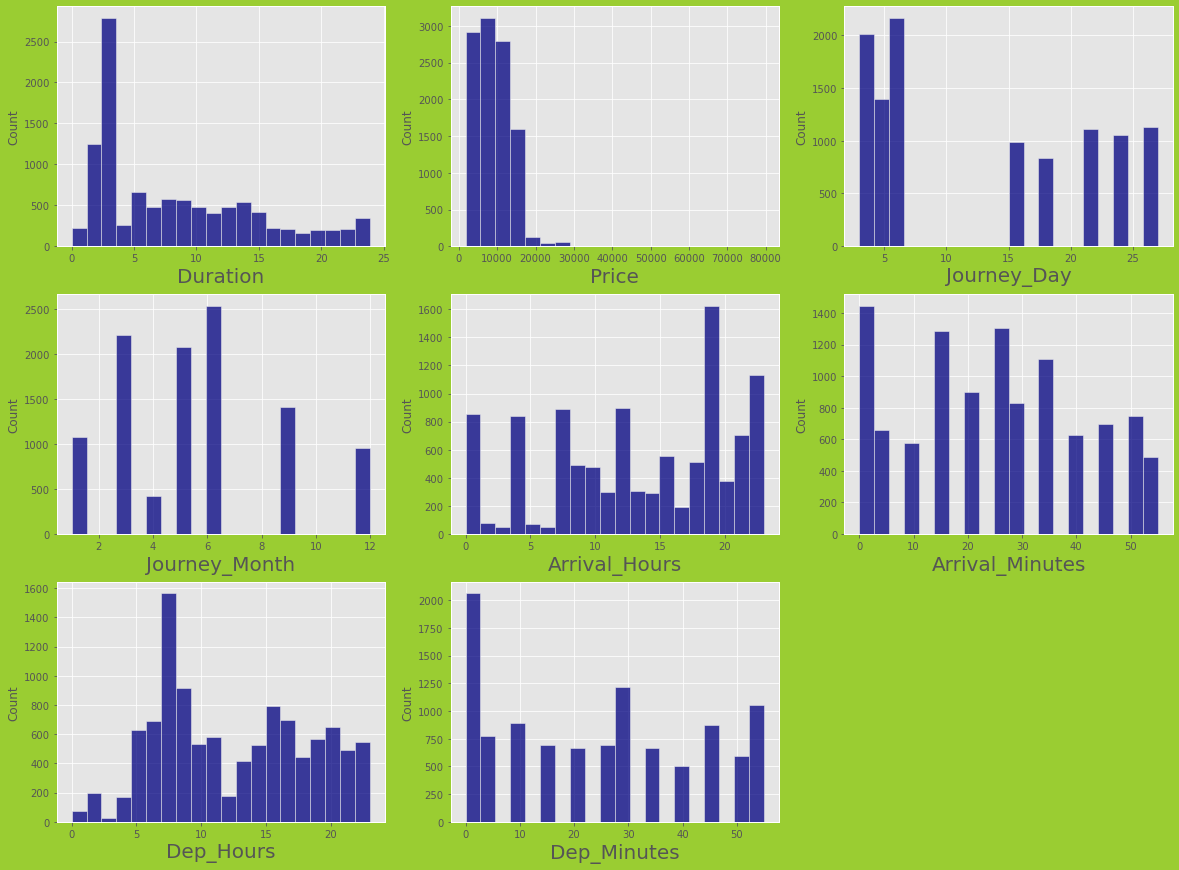

In [44]:
plt.figure(figsize=(20,15),facecolor='YellowGreen')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.histplot(df1[column],color='Navy',bins=20)
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : From b & c some skewness is also present in data set which i deal in later part.

#### d). Visualization using boxplot for checking outlier's

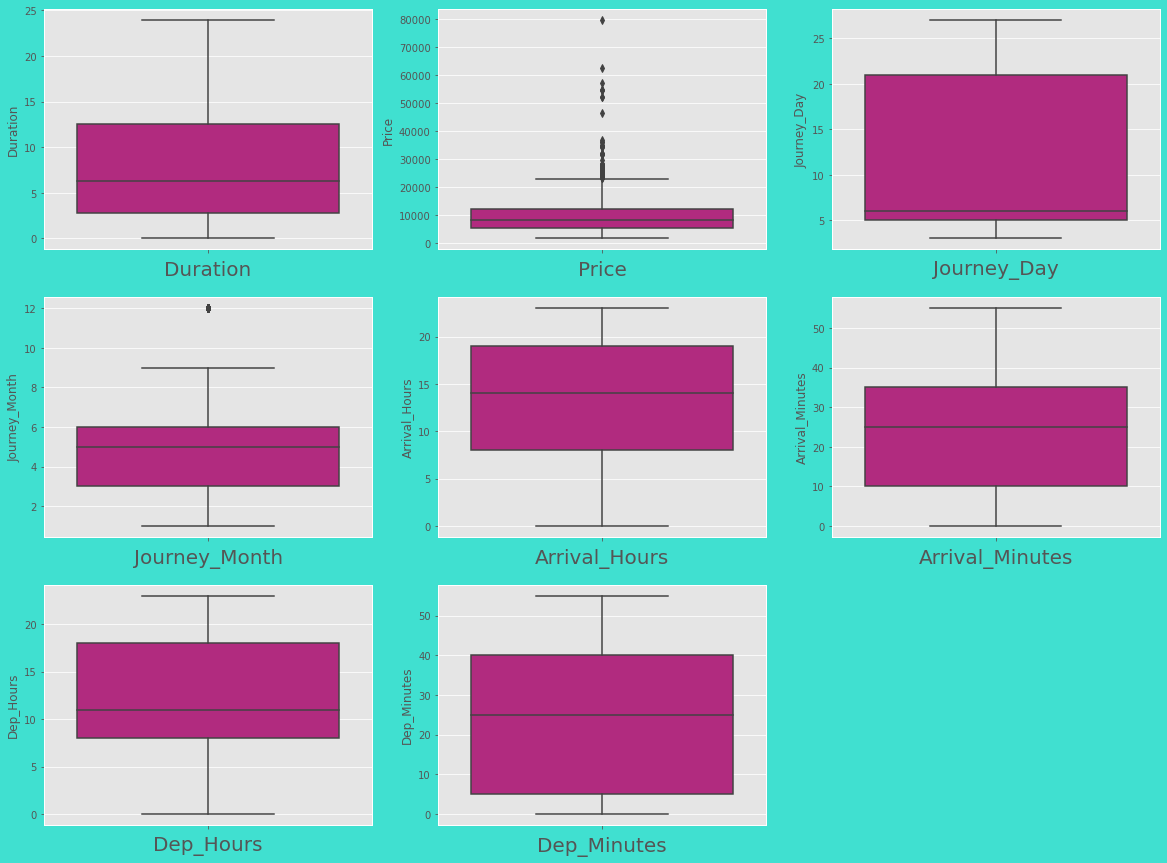

In [45]:
plt.figure(figsize=(20,15),facecolor='Turquoise')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.boxplot(y=df1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : Outlier's is present in Price and Journey_Month. Price is target so no need to worry. For Journey_Month outlier i will deal it in later part.

#### e). Visualization of object columns

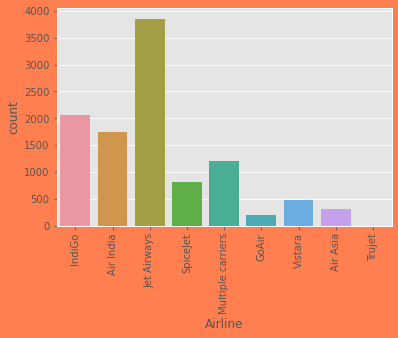

In [46]:
plt.figure(facecolor='Coral')
sns.countplot('Airline',data=df_train)
plt.xticks(rotation=90);

##### Outcome : For travelling mostly people used 'Jet-Airways' flight, then 'IndiGo, then 'Air India' and flight of 'Trujet' is used very less.

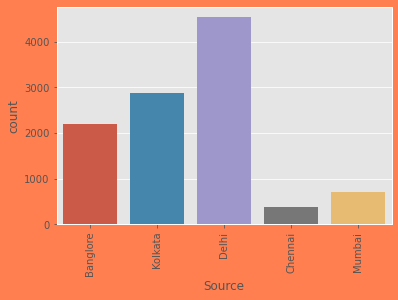

In [47]:
plt.figure(facecolor='Coral')
sns.countplot('Source',data=df_train)
plt.xticks(rotation=90);

##### Outcome : The Source of Moslty flight is 'Delhi', then 'Kolkata', then 'Banglore' and very less is 'Chennai'.

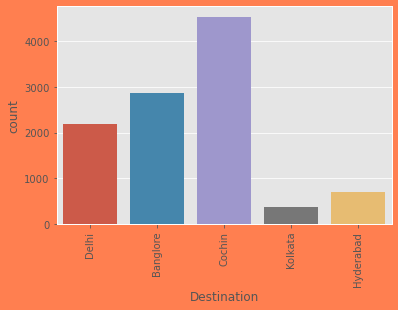

In [48]:
plt.figure(facecolor='Coral')
sns.countplot('Destination',data=df_train)
plt.xticks(rotation=90);

##### Outcome : The Destination of mostly is 'Cochin', then 'Banglore', then 'Delhi' and very less is 'Kolkata'.

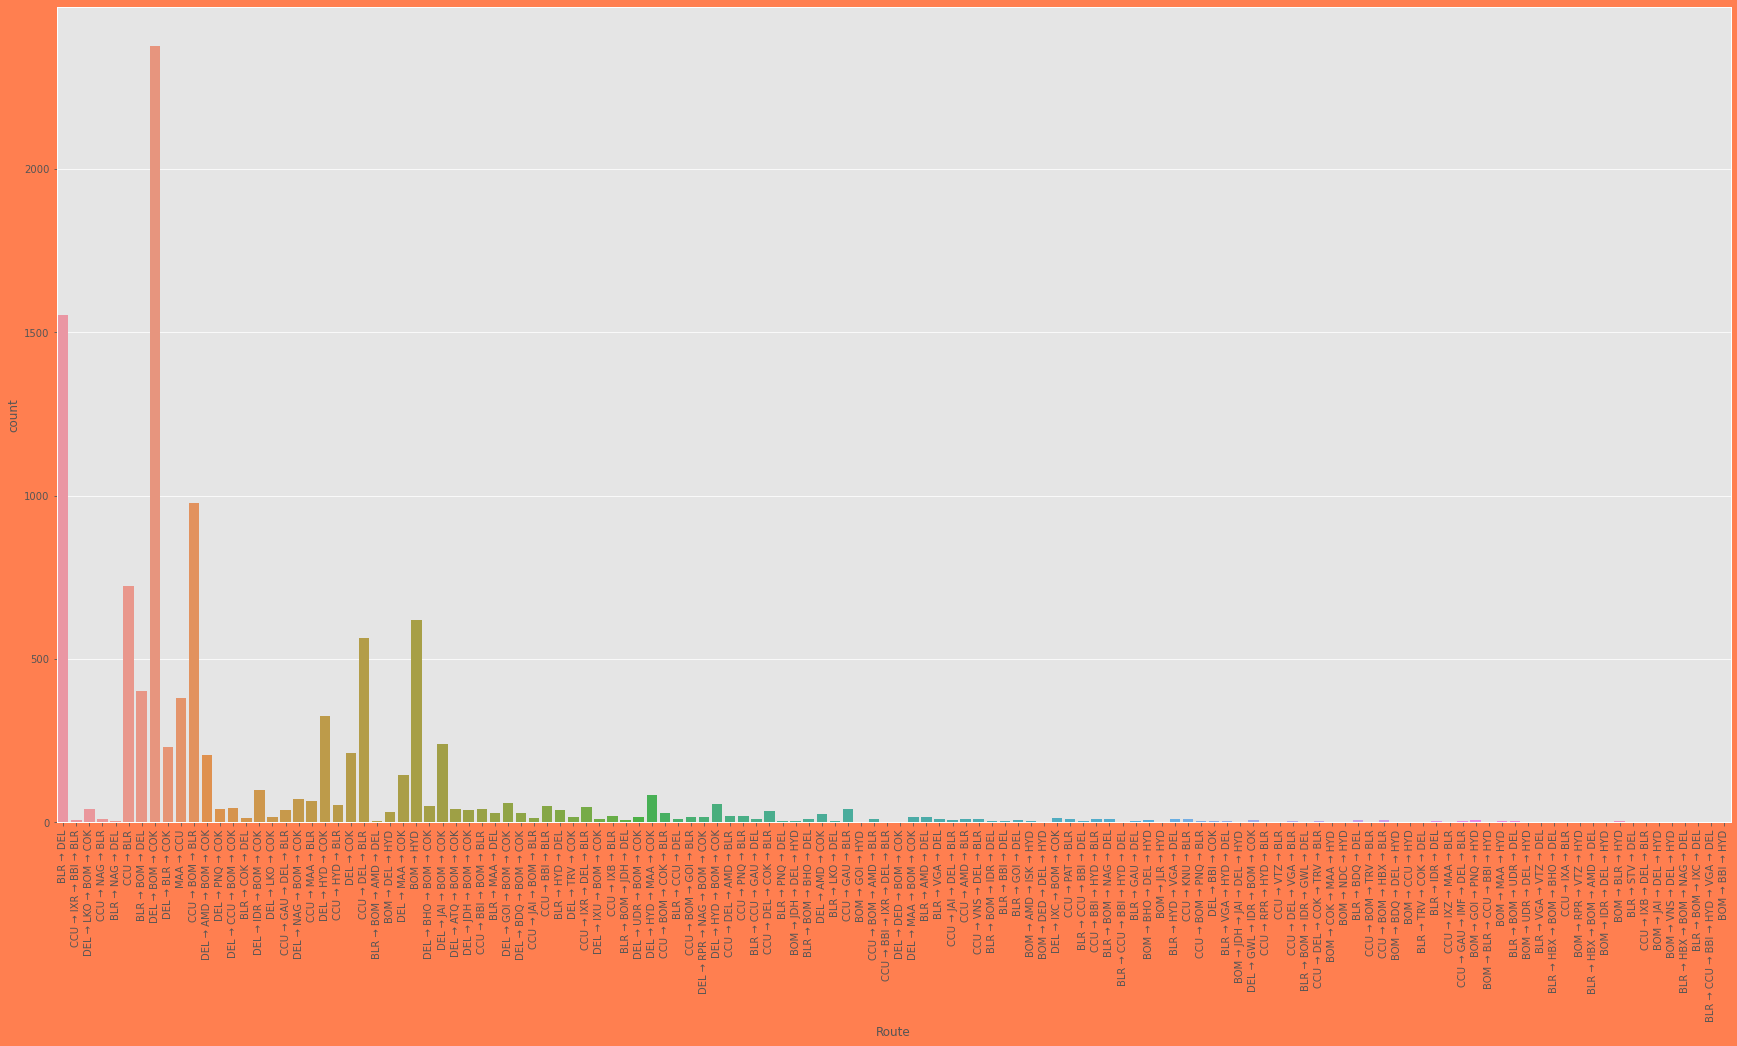

In [49]:
plt.figure(figsize=(30,15),facecolor='Coral')
sns.countplot('Route',data=df_train)
plt.xticks(rotation=90);

##### Outcome : Moslty fligh have route 'DEL → BOM → COK' i.e. the source and destination of these fligth is same and follow the same route.then 'BLR → DEL' and so on. It is also oberved on some route only single flight is available like 'BLR → HBX → BOM → NAG → DEL','BOM → DED → DEL → HYD' and so on.  

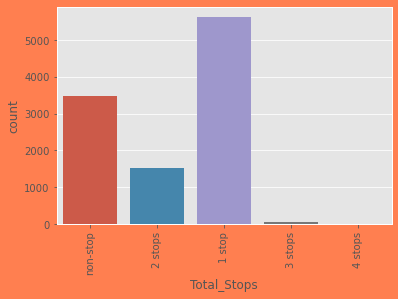

In [50]:
plt.figure(facecolor='Coral')
sns.countplot('Total_Stops',data=df_train)
plt.xticks(rotation=90);

##### Outcome : Mostly flight have '1 stop' in their whole journey,then 'non-stop'.flight those have '4 stops' are very less.

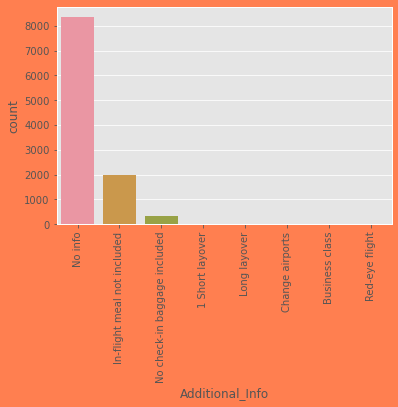

In [51]:
plt.figure(facecolor='Coral')
sns.countplot('Additional_Info',data=df_train)
plt.xticks(rotation=90);

##### Outcome : Additional_Info of mostly flight are not available, the count in the data set is 8345. Few flight are those in which 'In-flight meal not included' counting of these are 1982 and so on. 

### 7. Data Visualization with respect to target column

In [52]:
df_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration           float64
Total_Stops         object
Additional_Info     object
Price                int64
Journey_Day          int64
Journey_Month        int64
Arrival_Hours        int64
Arrival_Minutes      int64
Dep_Hours            int64
Dep_Minutes          int64
dtype: object

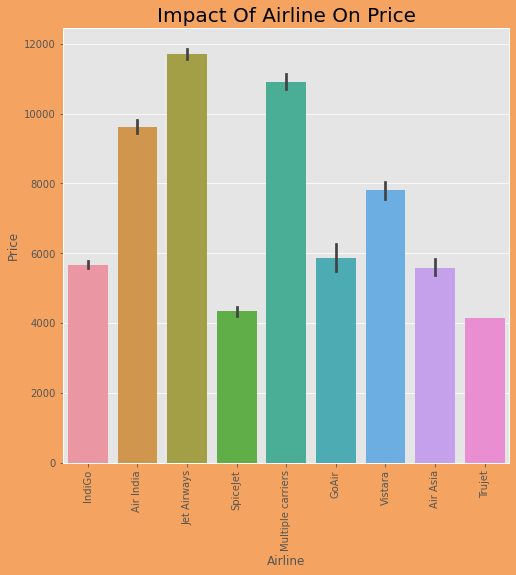

In [53]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Airline',y='Price',data=df_train)
plt.title('Impact Of Airline On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : The 'Jet Airways' are most expensive, then 'Multiple carriers', then 'Air India'. 'Trujet' and 'Spicejet' are cheepest in compared to other. 

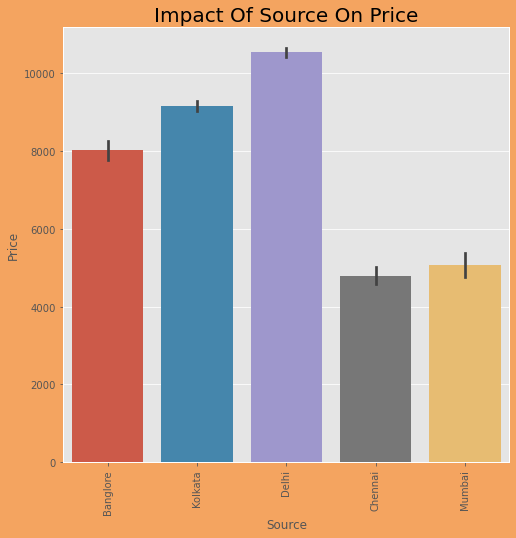

In [54]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Source',y='Price',data=df_train)
plt.title('Impact Of Source On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : The price is high when Source 'Delhi', then less high when source is 'Kolkata' and less when source is 'Chennai'.

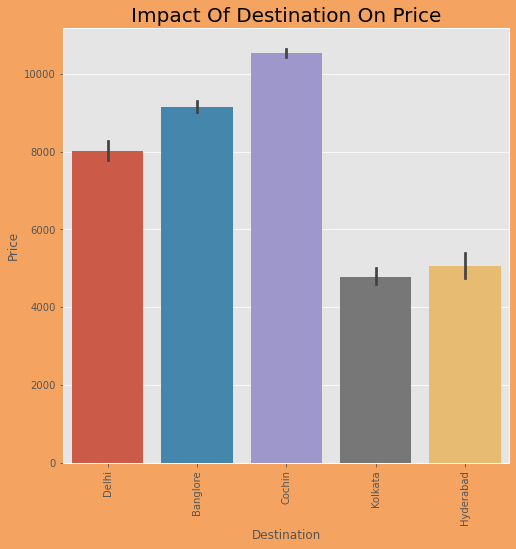

In [55]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Destination',y='Price',data=df_train)
plt.title('Impact Of Destination On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : The price is high when destination is 'Cochin', then less high when destination is 'Banglore' and less when destination is 'Kolkata'

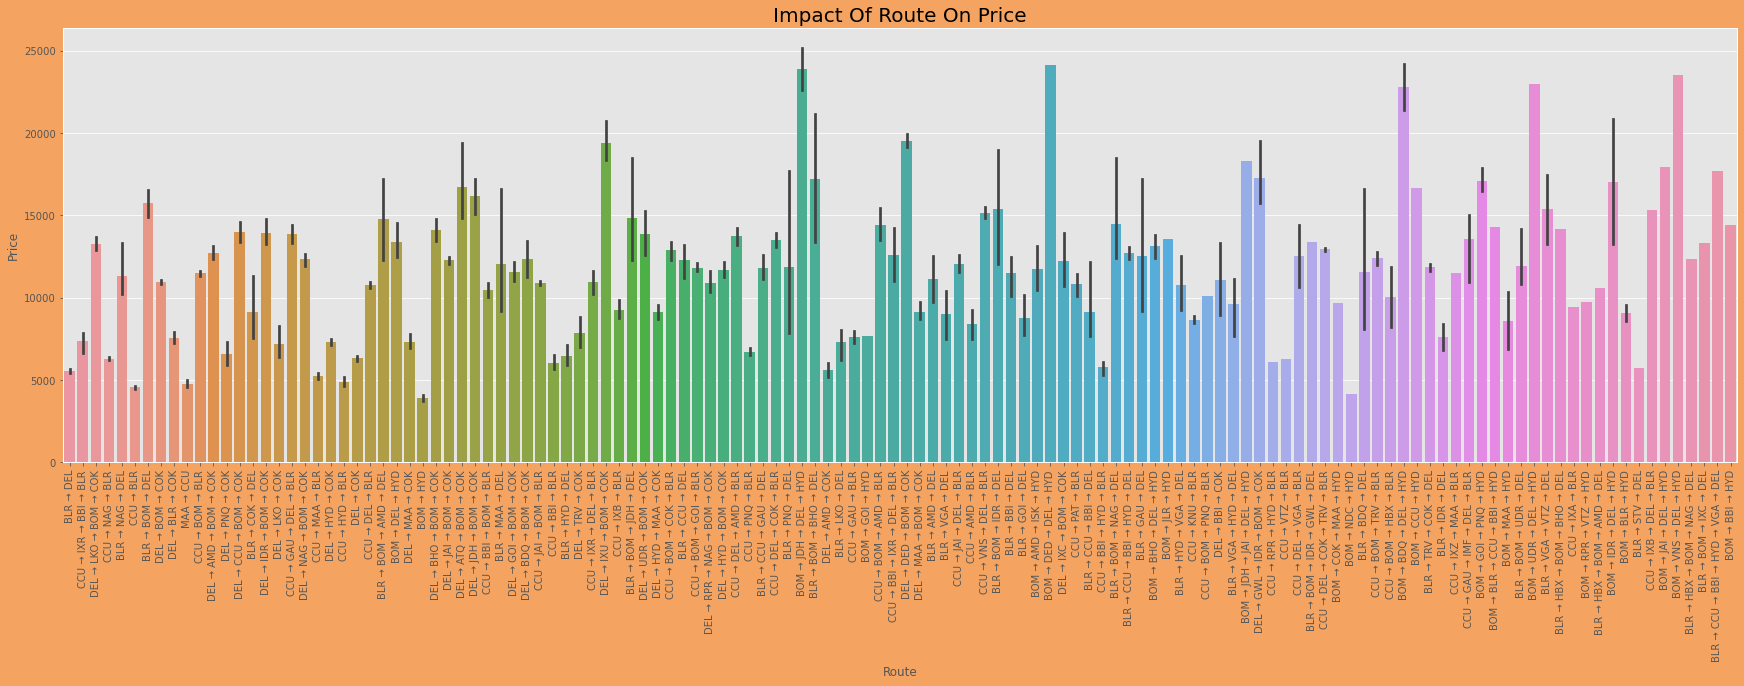

In [56]:
plt.figure(figsize=(30,8),facecolor='SandyBrown')
sns.barplot(x='Route',y='Price',data=df_train)
plt.title('Impact Of Route On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : BOM->JDH->DEL->HYD,BOM->DED->DEL->HYD and BOM->BDQ->DEL->HYD route have max price.

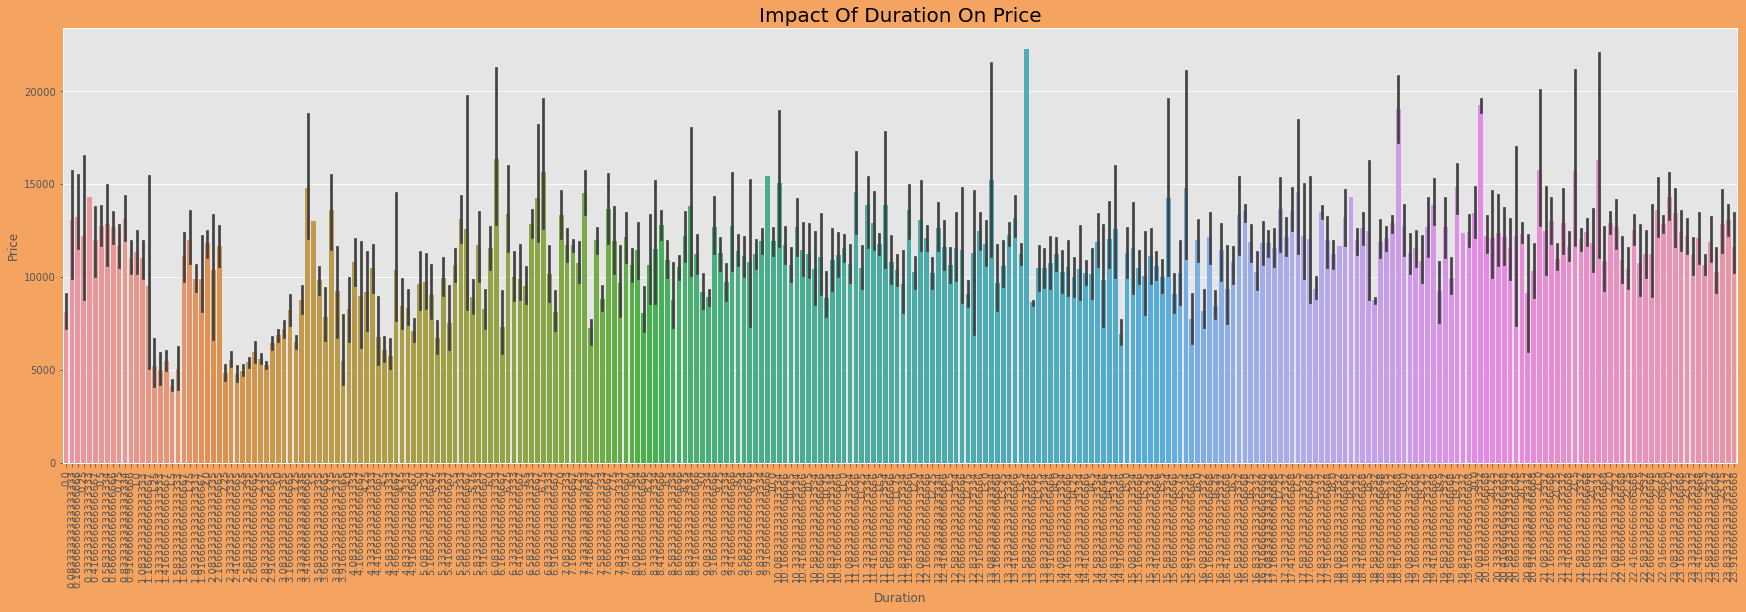

In [57]:
plt.figure(figsize=(30,8),facecolor='SandyBrown')
sns.barplot(x='Duration',y='Price',data=df_train)
plt.title('Impact Of Duration On Price',fontsize=20)
plt.xticks(rotation=90);

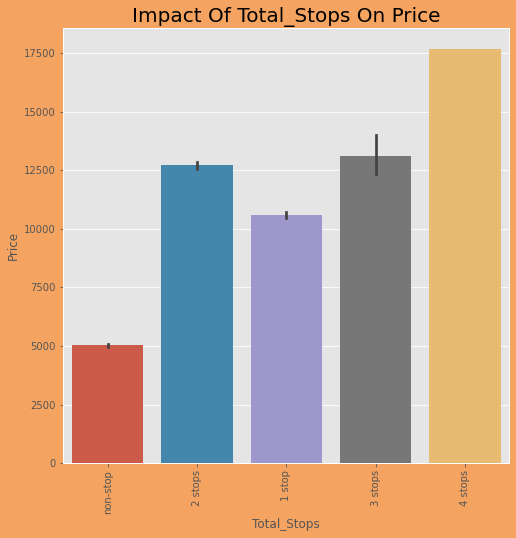

In [58]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Total_Stops',y='Price',data=df_train)
plt.title('Impact Of Total_Stops On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : Those flights who have 4 stops having high price, then less having 3 stops, then less having 2 stops, then less having 1 stops and very less price for those who are non-stop.

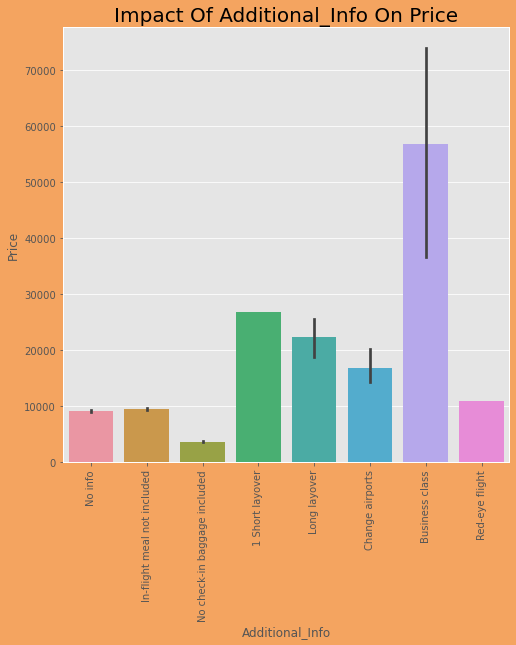

In [59]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Additional_Info',y='Price',data=df_train)
plt.title('Impact Of Additional_Info On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : Business class is the most costly class in flights.

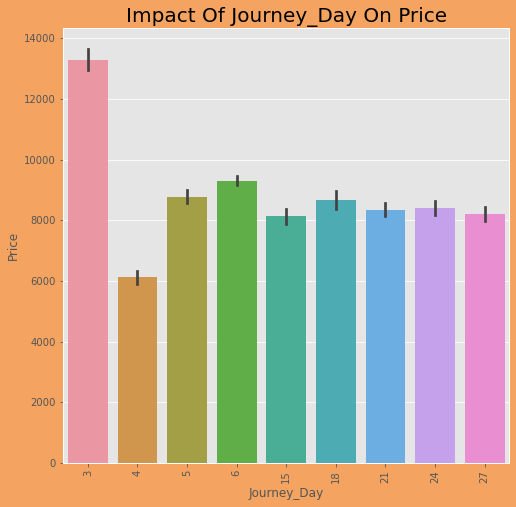

In [60]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Journey_Day',y='Price',data=df_train)
plt.title('Impact Of Journey_Day On Price',fontsize=20)
plt.xticks(rotation=90);

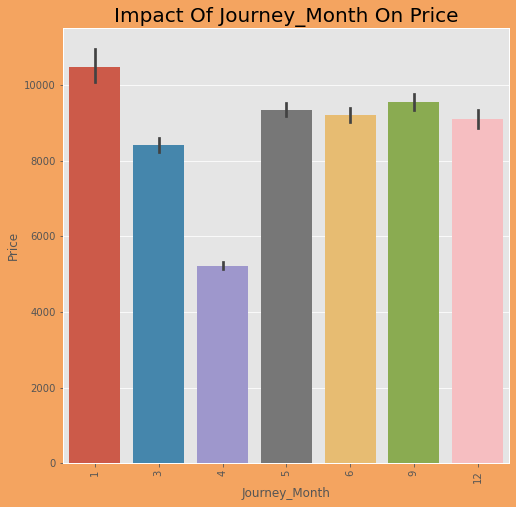

In [61]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Journey_Month',y='Price',data=df_train)
plt.title('Impact Of Journey_Month On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome :The price of month '1' is high while price of month '4' is low in comapre to other's.

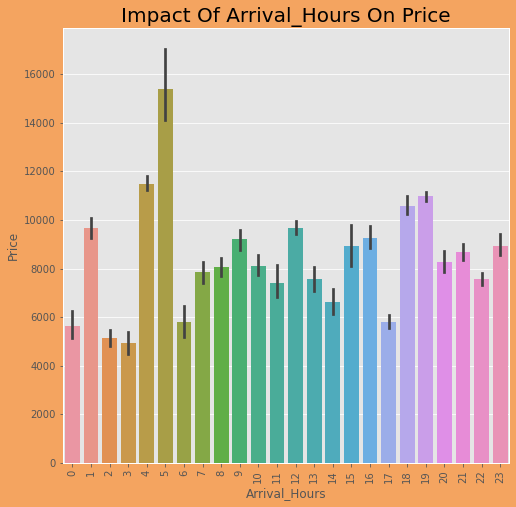

In [62]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Arrival_Hours',y='Price',data=df_train)
plt.title('Impact Of Arrival_Hours On Price',fontsize=20)
plt.xticks(rotation=90);

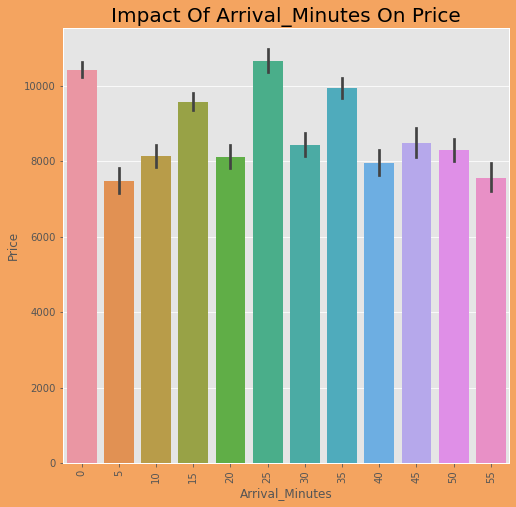

In [63]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Arrival_Minutes',y='Price',data=df_train)
plt.title('Impact Of Arrival_Minutes On Price',fontsize=20)
plt.xticks(rotation=90);

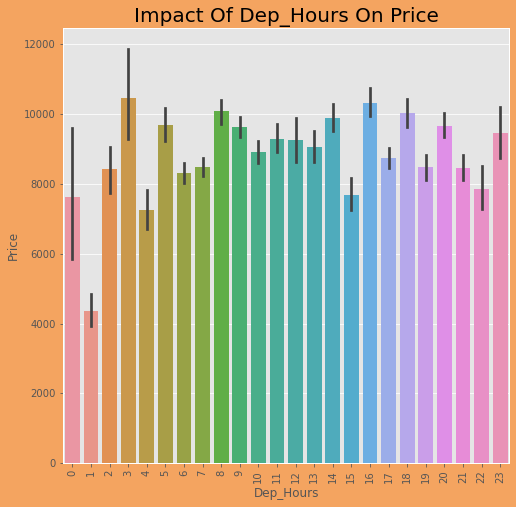

In [64]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Dep_Hours',y='Price',data=df_train)
plt.title('Impact Of Dep_Hours On Price',fontsize=20)
plt.xticks(rotation=90);

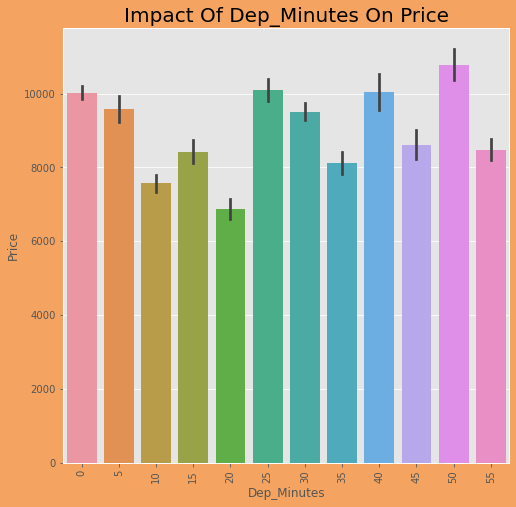

In [65]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(x='Dep_Minutes',y='Price',data=df_train)
plt.title('Impact Of Dep_Minutes On Price',fontsize=20)
plt.xticks(rotation=90);

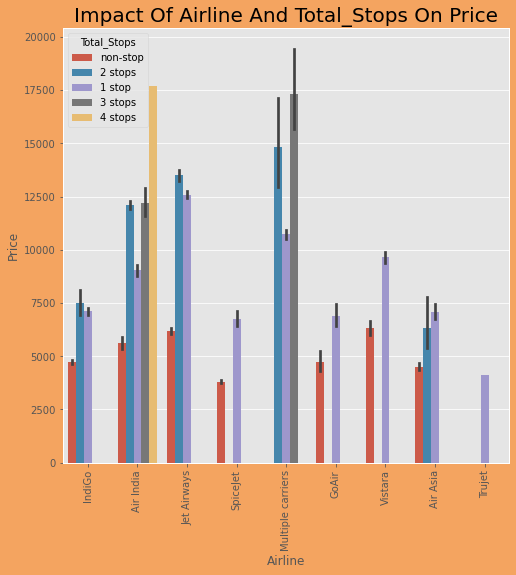

In [66]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(y='Price',x='Airline',hue='Total_Stops',data=df_train)
plt.title('Impact Of Airline And Total_Stops On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : If flight have more stops then it will impact on the price. Only 'Air India' flight have all type of stops and 'Air India' charge high price if flight have 4 stpos. These 4 stops are max stops for flight.However 'Muliple Carriers' fliht have max 3 stops so the flight with 3 stops have higher price.

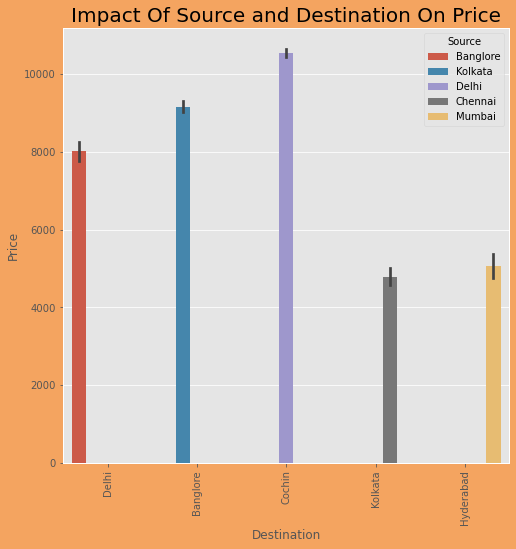

In [67]:
plt.figure(figsize=(8,8),facecolor='SandyBrown')
sns.barplot(y='Price',x='Destination',hue='Source',data=df_train)
plt.title('Impact Of Source and Destination On Price',fontsize=20)
plt.xticks(rotation=90);

##### Outcome : The maximum price for Delhi-Cochin flight, then less price for Kolkata-Banglore,then less Banglore-Delhi, then less Mumbai-Hydrabad, then smalles price for Kokata-Chennai.

### 8. Features Engineering

#### a). Dealing with outlier's

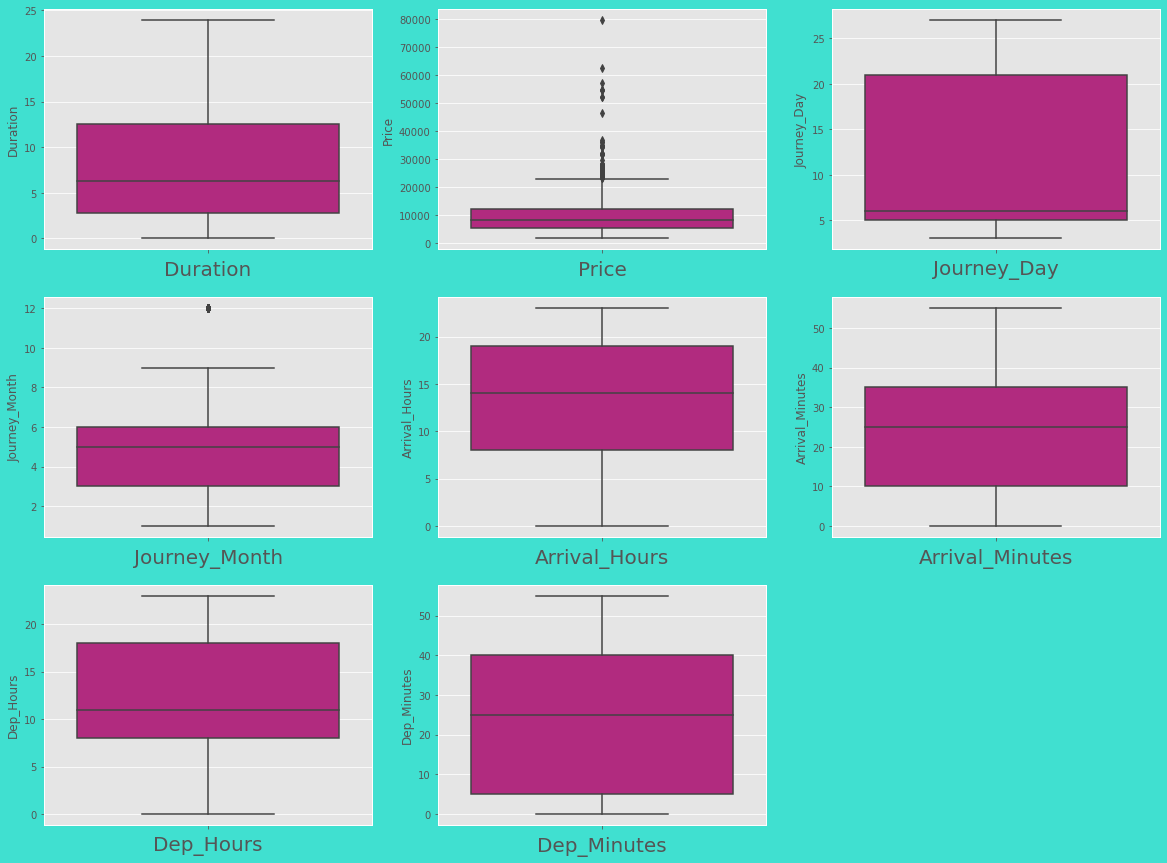

In [68]:
plt.figure(figsize=(20,15),facecolor='Turquoise')
plt.style.use('ggplot')
plot_no = 1
for column in df1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.boxplot(y=df1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

##### Outcome : Price and Journey_Month have outlier's. As 'Price' is target variable so no need to worry about. 

In [69]:
# finding the outliers

# 1st quantile
q1 = df_train.quantile(0.25) 

# 3rd quantile
q3 = df_train.quantile(0.75)

#IQR
iqr = q3-q1

In [70]:
# Deal with 'Journey_Month' outliers

# finding the High outliers
pre_high = q3.Journey_Month + (1.5 * iqr.Journey_Month)
print('The Higher Outliers For Journey_Month is :',pre_high)

# finding the index of these above the value
pre_high_index = np.where(df_train['Journey_Month']>pre_high)
print('The index are :',pre_high_index)

# Drop these index from data frame
df_train_o = df_train.drop(df_train.index[pre_high_index])

df_train_o.reset_index(drop=True)

The Higher Outliers For Journey_Month is : 10.5
The index are : (array([    3,     6,     8,    17,    18,    69,    92,    99,   103,
         111,   112,   118,   124,   126,   132,   153,   158,   164,
         175,   184,   189,   194,   196,   210,   218,   220,   221,
         231,   243,   267,   271,   277,   280,   286,   289,   302,
         312,   323,   333,   347,   366,   377,   400,   409,   411,
         416,   423,   430,   441,   465,   480,   499,   547,   561,
         564,   620,   625,   627,   642,   649,   669,   685,   694,
         711,   718,   728,   733,   743,   802,   819,   840,   863,
         867,   900,   917,   919,   921,   942,   947,   949,   955,
         972,   976,   980,   981,   994,   995,  1005,  1023,  1035,
        1075,  1081,  1088,  1098,  1106,  1123,  1130,  1139,  1162,
        1165,  1170,  1197,  1202,  1212,  1228,  1251,  1266,  1267,
        1297,  1349,  1352,  1366,  1373,  1383,  1393,  1417,  1439,
        1446,  1447,  146

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,3,1,21,35,16,50
4,SpiceJet,Kolkata,Banglore,CCU → BLR,2.416667,non-stop,No info,3873,24,6,11,25,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9721,Air Asia,Kolkata,Banglore,CCU → BLR,2.500000,non-stop,No info,4107,4,9,22,25,19,55
9722,Air India,Kolkata,Banglore,CCU → BLR,2.583333,non-stop,No info,4145,27,4,23,20,20,45
9723,Jet Airways,Banglore,Delhi,BLR → DEL,3.000000,non-stop,No info,7229,27,4,11,20,8,20
9724,Vistara,Banglore,Delhi,BLR → DEL,2.666667,non-stop,No info,12648,3,1,14,10,11,30


In [71]:
print('Before ouliers remove the shape is :',df_train.shape)
print('Now the shape is :',df_train_o.shape)    
print('The loss of data in percentage is :',(df_train.shape[0]-df_train_o.shape[0])/df_train.shape[0]*100)

Before ouliers remove the shape is : (10683, 14)
Now the shape is : (9726, 14)
The loss of data in percentage is : 8.958157820836844


#### b). Dealing with skewness

In [72]:
df_train_o.skew()

Duration           0.851356
Price              1.892394
Journey_Day        0.205870
Journey_Month      0.179871
Arrival_Hours     -0.374118
Arrival_Minutes    0.111059
Dep_Hours          0.123756
Dep_Minutes        0.177822
dtype: float64

##### Outcome : Skewness is in 'Duration' and 'Price'. As 'Price' is target variable so i deal only with 'Duration'.

In [73]:
from sklearn.preprocessing import PowerTransformer

In [74]:
pt = PowerTransformer(method='yeo-johnson')

In [75]:
test = ['Duration']

In [76]:
df_train_o[test] = pt.fit_transform(df_train_o[test].values)

In [77]:
df_train_o.skew()

Duration           0.000721
Price              1.892394
Journey_Day        0.205870
Journey_Month      0.179871
Arrival_Hours     -0.374118
Arrival_Minutes    0.111059
Dep_Hours          0.123756
Dep_Minutes        0.177822
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

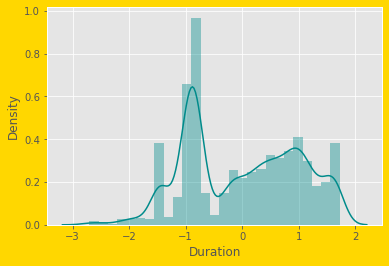

In [78]:
plt.figure(facecolor='Gold')
sns.distplot(df_train_o['Duration'],color='DarkCyan')

#### c). Encoding the categorical column using Label Encoder

In [79]:
df_train_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9726 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          9726 non-null   object 
 1   Source           9726 non-null   object 
 2   Destination      9726 non-null   object 
 3   Route            9726 non-null   object 
 4   Duration         9726 non-null   float64
 5   Total_Stops      9726 non-null   object 
 6   Additional_Info  9726 non-null   object 
 7   Price            9726 non-null   int64  
 8   Journey_Day      9726 non-null   int64  
 9   Journey_Month    9726 non-null   int64  
 10  Arrival_Hours    9726 non-null   int64  
 11  Arrival_Minutes  9726 non-null   int64  
 12  Dep_Hours        9726 non-null   int64  
 13  Dep_Minutes      9726 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 1.1+ MB


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
lb = LabelEncoder()

In [82]:
df_train_o['Airline'] = lb.fit_transform(df_train_o['Airline'])
df_train_o['Source'] = lb.fit_transform(df_train_o['Source'])
df_train_o['Destination'] = lb.fit_transform(df_train_o['Destination'])
df_train_o['Route'] = lb.fit_transform(df_train_o['Route'])
df_train_o['Total_Stops'] = lb.fit_transform(df_train_o['Total_Stops'])
df_train_o['Additional_Info'] = lb.fit_transform(df_train_o['Additional_Info'])

In [83]:
df_train_o

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,3,0,2,16,-0.848535,4,6,3897,24,3,1,10,22,20
1,1,3,0,78,0.232876,1,6,7662,5,1,13,15,5,50
2,4,2,1,112,1.420381,1,6,13882,6,9,4,25,9,25
4,3,0,2,27,-0.290740,0,6,13302,3,1,21,35,16,50
5,6,3,0,58,-1.006944,4,6,3873,24,6,11,25,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,58,-0.973766,4,6,4107,4,9,22,25,19,55
10679,1,3,0,58,-0.941372,4,6,4145,27,4,23,20,20,45
10680,4,0,2,16,-0.789958,4,6,7229,27,4,11,20,8,20
10681,8,0,2,16,-0.909724,4,6,12648,3,1,14,10,11,30


### 9. Correlation matrix to see the coffecient of multicolinearity

#### a). Visualize by matrix

In [84]:
df_corr = df_train_o.corr().abs()
df_corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
Airline,1.000000,0.011183,0.060652,0.017397,0.028970,0.004232,0.146616,0.020880,0.025750,0.008746,0.014642,0.083493,0.024661,0.067040
Source,0.011183,1.000000,0.428689,0.385694,0.067225,0.221031,0.042452,0.010360,0.009863,0.071145,0.023022,0.018436,0.064645,0.045119
Destination,0.060652,0.428689,1.000000,0.210140,0.392358,0.512082,0.076846,0.263846,0.003989,0.072687,0.059000,0.006345,0.087151,0.091917
Route,0.017397,0.385694,0.210140,1.000000,0.338264,0.453097,0.017851,0.170346,0.076424,0.131410,0.016679,0.177685,0.074617,0.054603
Duration,0.028970,0.067225,0.392358,0.338264,1.000000,0.672052,0.129913,0.474787,0.022784,0.064575,0.011640,0.151809,0.031530,0.041839
Total_Stops,0.004232,0.221031,0.512082,0.453097,0.672052,1.000000,0.157733,0.564336,0.044106,0.064477,0.096247,0.178254,0.048151,0.055810
Additional_Info,0.146616,0.042452,0.076846,0.017851,0.129913,0.157733,1.000000,0.042563,0.036811,0.018736,0.030537,0.041405,0.043188,0.007537
Price,0.020880,0.010360,0.263846,0.170346,0.474787,0.564336,0.042563,1.000000,0.175841,0.013499,0.021683,0.083728,0.007035,0.030633
Journey_Day,0.025750,0.009863,0.003989,0.076424,0.022784,0.044106,0.036811,0.175841,1.000000,0.117084,0.000101,0.019700,0.006146,0.006040
Journey_Month,0.008746,0.071145,0.072687,0.131410,0.064575,0.064477,0.018736,0.013499,0.117084,1.000000,0.012621,0.046453,0.015338,0.027075


#### b). Visualize by heatmap

<AxesSubplot:>

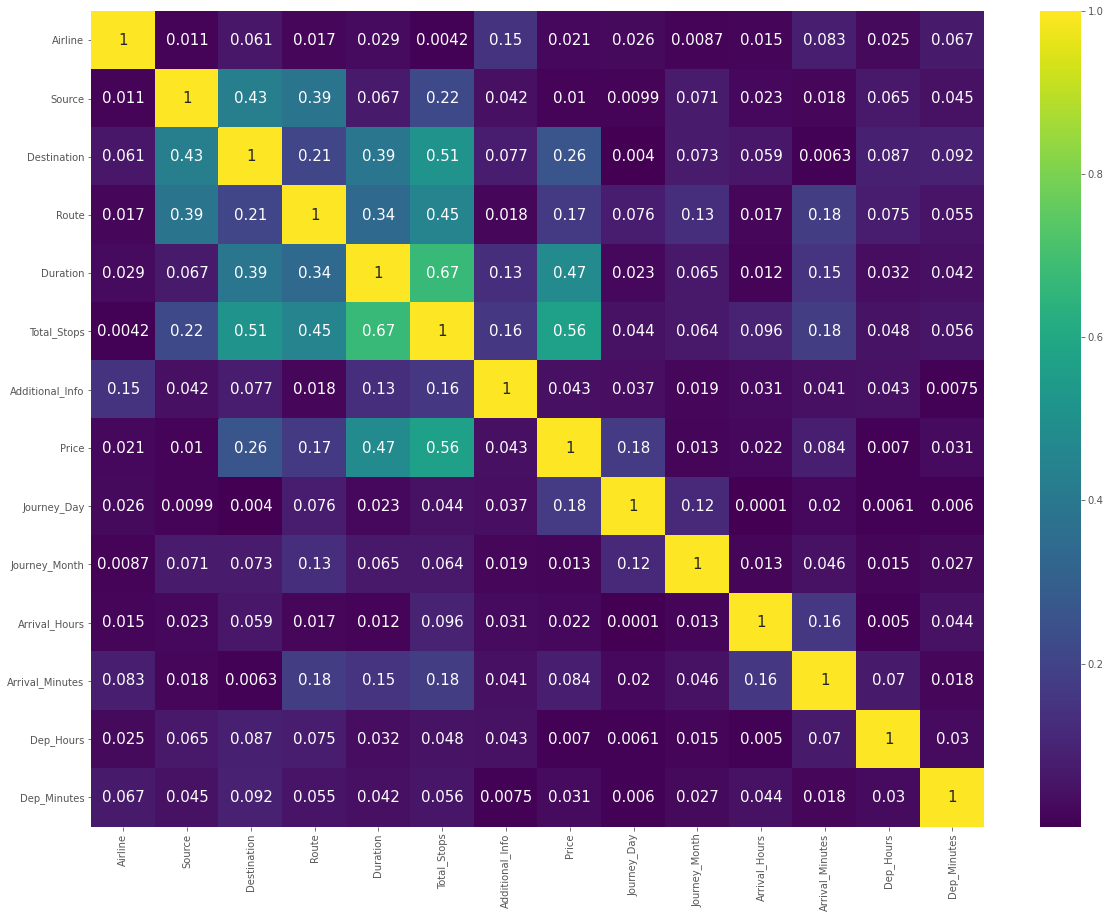

In [85]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15},cmap='viridis')

##### Outcome :
* 'Duration' and 'Total_Stops' are highly coorelated with target.
* Then 'Destination' and 'Route' less related wiht target.
* Rest features are very less related to target.
* Total_Stops,Duration and Destination are highly coorelated with each other so there may be multicolinearity exist. Wii ensure it later processing.

### 10. Sepatating the dependent variable as y as Price and rest are independent variable as X

In [86]:
y = df_train_o['Price']
X = df_train_o.drop(columns='Price',axis=1)

### 11. Scaling the data set using Standard Scaler

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
ss = StandardScaler()

In [89]:
X_scaled = ss.fit_transform(X)

In [90]:
X_scaled

array([[-0.34173906, -1.66991582,  0.81380227, ..., -0.88703805,
         1.6625056 , -0.22570266],
       [-1.45953094,  0.90607169, -1.17840535, ..., -0.58406951,
        -1.29518664,  1.37564741],
       [ 0.21715687,  0.04740919, -0.18230154, ...,  0.02186756,
        -0.59925905,  0.04118902],
       ...,
       [ 0.21715687, -1.66991582,  0.81380227, ..., -0.28110097,
        -0.77324095, -0.22570266],
       [ 2.45274062, -1.66991582,  0.81380227, ..., -0.88703805,
        -0.25129526,  0.3080807 ],
       [-1.45953094,  0.04740919, -0.18230154, ..., -0.58406951,
        -0.42527715,  1.64253909]])

### 12. Checking multicolinearity using VIF

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.044160,Airline
1,1.482011,Source
2,1.709253,Destination
3,1.572999,Route
4,1.927759,Duration
5,2.446955,Total_Stops
6,1.075900,Additional_Info
7,1.037546,Journey_Day
8,1.040926,Journey_Month
9,1.046165,Arrival_Hours


###### Outcome : vif score is normal so there is no multicolinerity exist.

### 12. Observing best random state & split the data using best random state

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [94]:
lr = RandomForestRegressor()
max_accuracy = 0
max_rs = 0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=i)
    lr.fit(X_train,y_train)
    lr_pred_test = lr.predict(X_test)
    accuracy = r2_score(y_test,lr_pred_test)
    if accuracy>max_accuracy:
        max_accuracy = accuracy
        max_rs = i
print('Maximum accuracy is :',max_accuracy,'On random state :',max_rs)

Maximum accuracy is : 0.9091506630893398 On random state : 53


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=max_rs)

### 13. Initiate our model

In [96]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

#### a). Linear Regression Model

In [97]:
lr = LinearRegression()
lr.fit(X_train,y_train)
score_pred_lr = lr.score(X_test,y_test)*100
y_pred_lr = lr.predict(X_test)
mse_lr=mean_squared_error(y_test,y_pred_lr)
score_lr=np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test,y_pred_lr)
print('The score by Linear Regression on test set is :',score_pred_lr)
print('The MSE score is :',mse_lr)
print('The RMSE score is :',score_lr)
print('The r2 score is :',r2_score_lr)

The score by Linear Regression on test set is : 40.176645970260495
The MSE score is : 12061213.847907769
The RMSE score is : 3472.925833919833
The r2 score is : 0.40176645970260494


#### Cross Validation on Linear Regression Mode

In [98]:
score=cross_val_score(lr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_lr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_lr),np.std(score_cross_lr))

The cross validation score : 3773.4292315643906 464.99787333231876


#### b). KNN Model

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)
score_pred_kn = kn.score(X_test,y_test)*100
y_pred_kn = kn.predict(X_test)
mse_kn=mean_squared_error(y_test,y_pred_kn)
score_kn=np.sqrt(mse_kn)
r2_score_kn = r2_score(y_test,y_pred_kn)
print('The score by K-Neighbors Regressor on test set is :',score_pred_kn)
print('The MSE score is :',mse_kn)
print('The RMSE score is :',score_kn)
print('The r2 score is :',r2_score_kn)

The score by K-Neighbors Regressor on test set is : 71.04918650977083
The MSE score is : 5836883.575651091
The RMSE score is : 2415.964315889432
The r2 score is : 0.7104918650977083


#### Cross Validation K-Neighbors Regressor

In [101]:
score=cross_val_score(kn,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_kn=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_kn),np.std(score_cross_kn))

The cross validation score : 2732.6878522585375 474.18587848940575


#### c). Decision Tree Model

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
score_pred_dt = dt.score(X_test,y_test)*100
y_pred_dt = dt.predict(X_test)
mse_dt=mean_squared_error(y_test,y_pred_dt)
score_dt=np.sqrt(mse_dt)
r2_score_dt = r2_score(y_test,y_pred_dt)
print('The score by  Decision TreeRegressor on test set is :',score_pred_dt)
print('The MSE score is :',mse_dt)
print('The RMSE score is :',score_dt)
print('The r2 score is :',r2_score_dt)

The score by  Decision TreeRegressor on test set is : 84.77505940353787
The MSE score is : 3069558.1572429906
The RMSE score is : 1752.015455766013
The r2 score is : 0.8477505940353787


#### Cross Validation Decision Tree Regressor

In [104]:
score=cross_val_score(dt,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_dt=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_dt),np.std(score_cross_dt))

The cross validation score : 2244.1908418582884 647.2154054260676


#### d). Random Forest Model

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
score_pred_rf = rf.score(X_test,y_test)*100
y_pred_rf = rf.predict(X_test)
mse_rf=mean_squared_error(y_test,y_pred_rf)
score_rf=np.sqrt(mse_rf)
r2_score_rf = r2_score(y_test,y_pred_rf)
print('The score by  Random Forest Regressor on test set is :',score_pred_rf)
print('The MSE score is :',mse_rf)
print('The RMSE score is :',score_rf)
print('The r2 score is :',r2_score_rf)

The score by  Random Forest Regressor on test set is : 90.46788084156975
The MSE score is : 1921806.7836252064
The RMSE score is : 1386.2924596293549
The r2 score is : 0.9046788084156976


#### Cross Validation Random Forest Regressor

In [107]:
score=cross_val_score(rf,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_rf=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_rf),np.std(score_cross_rf))

The cross validation score : 1726.8623624760032 444.94639445559363


#### e). Support Vector Machine

In [108]:
from sklearn.svm import SVR

In [109]:
sr = SVR()
sr.fit(X_train,y_train)
score_pred_sr = sr.score(X_test,y_test)*100
y_pred_sr = sr.predict(X_test)
mse_sr=mean_squared_error(y_test,y_pred_sr)
score_sr=np.sqrt(mse_sr)
r2_score_sr = r2_score(y_test,y_pred_sr)
print('The score by  Support Vector Machine Regressor on test set is :',score_pred_sr)
print('The MSE score is :',mse_sr)
print('The RMSE score is :',score_sr)
print('The r2 score is :',r2_score_sr)

The score by  Support Vector Machine Regressor on test set is : 1.5510945312114721
The MSE score is : 19848658.123735856
The RMSE score is : 4455.183287333514
The r2 score is : 0.015510945312114721


#### Cross Validation On Support Vector Machine Regressor

In [110]:
score=cross_val_score(sr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_sr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_sr),np.std(score_cross_sr))

The cross validation score : 4733.2277097988435 461.0129204674725


#### f). Bagging Regressor

In [111]:
from sklearn.ensemble import BaggingRegressor

In [112]:
br = BaggingRegressor()
br.fit(X_train,y_train)
score_pred_br = br.score(X_test,y_test)*100
y_pred_br = br.predict(X_test)
mse_br=mean_squared_error(y_test,y_pred_br)
score_br=np.sqrt(mse_br)
r2_score_br = r2_score(y_test,y_pred_br)
print('The score by  Bagging Regressor on test set is :',score_pred_br)
print('The MSE score is :',mse_br)
print('The RMSE score is :',score_br)
print('The r2 score is :',r2_score_br)

The score by  Bagging Regressor on test set is : 88.32013110651891
The MSE score is : 2354822.773222811
The RMSE score is : 1534.5431806315555
The r2 score is : 0.8832013110651892


#### Cross Validation on Bagging Regressor

In [113]:
score=cross_val_score(br,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_br=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_br),np.std(score_cross_br))

The cross validation score : 1808.1233522680777 448.57188859809446


#### g). Ada Boost Regressor 

In [114]:
from sklearn.ensemble import AdaBoostRegressor

In [115]:
ar = AdaBoostRegressor()
ar.fit(X_train,y_train)
score_pred_ar = ar.score(X_test,y_test)*100
y_pred_ar = ar.predict(X_test)
mse_ar=mean_squared_error(y_test,y_pred_ar)
score_ar=np.sqrt(mse_ar)
r2_score_ar = r2_score(y_test,y_pred_ar)
print('The score by  Ada Boost Regressor on test set is :',score_pred_ar)
print('The MSE score is :',mse_ar)
print('The RMSE score is :',score_ar)
print('The r2 score is :',r2_score_ar)

The score by  Ada Boost Regressor on test set is : 31.501997752786814
The MSE score is : 13810142.655114228
The RMSE score is : 3716.200028942768
The r2 score is : 0.31501997752786814


#### Corss Validation on Ada Boost Regressor

In [116]:
score=cross_val_score(ar,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_ar=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_ar),np.std(score_cross_ar))

The cross validation score : 3671.954134887078 289.5573153579532


#### h). Gradient Boosting Regressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
score_pred_gr = gr.score(X_test,y_test)*100
y_pred_gr = gr.predict(X_test)
mse_gr=mean_squared_error(y_test,y_pred_gr)
score_gr=np.sqrt(mse_gr)
r2_score_gr = r2_score(y_test,y_pred_gr)
print('The score by  Gradient Boosting Regressor on test set is :',score_pred_gr)
print('The MSE score is :',mse_gr)
print('The RMSE score is :',score_gr)
print('The r2 score is :',r2_score_gr)

The score by  Gradient Boosting Regressor on test set is : 82.91356033023564
The MSE score is : 3444862.0626311577
The RMSE score is : 1856.0339605274355
The r2 score is : 0.8291356033023565


#### Corss Validation on Gradient Boosting Regressor

In [119]:
score=cross_val_score(gr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_gr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_gr),np.std(score_cross_gr))

The cross validation score : 2157.156699792507 470.4472043426003


#### i). XGB Boost

In [120]:
import xgboost as xb

In [121]:
xr = xb.XGBRegressor()
xr.fit(X_train,y_train)
score_pred_xr = xr.score(X_test,y_test)*100
y_pred_xr = xr.predict(X_test)
mse_xr=mean_squared_error(y_test,y_pred_xr)
score_xr=np.sqrt(mse_xr)
r2_score_xr = r2_score(y_test,y_pred_xr)
print('The score by  XGB Boost Regressor on test set is :',score_pred_xr)
print('The MSE score is :',mse_xr)
print('The RMSE score is :',score_xr)
print('The r2 score is :',r2_score_xr)

The score by  XGB Boost Regressor on test set is : 91.17134875302804
The MSE score is : 1779977.9434865967
The RMSE score is : 1334.1581403591542
The r2 score is : 0.9117134875302805


#### Corss Validation on XGB Regressor

In [122]:
score=cross_val_score(xr,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
score_cross_xr=np.sqrt(-score)
print('The cross validation score :',np.mean(score_cross_xr),np.std(score_cross_xr))

The cross validation score : 1804.3555861664652 535.9695218250739


### 14. Observing the score

In [123]:
all_score = pd.DataFrame({})

In [124]:
all_score['Name Of Model'] = ['Linear Regression','K-Neighbors Regressor','Decision Tree Regressor','Random Forest Regressor','Support Vector Machine Regressor','Bagging Regressor','Ada Boost Regressor','Gradient Boosting Regressor','XGB Regressor']

In [125]:
all_score['Score On Test'] = [score_pred_lr,score_pred_kn,score_pred_dt,score_pred_rf,score_pred_sr,score_pred_br,score_pred_ar,score_pred_gr,score_pred_xr]

In [126]:
all_score['R2 Score'] = [r2_score_lr,r2_score_kn,r2_score_dt,r2_score_rf,r2_score_sr,r2_score_br,r2_score_ar,r2_score_gr,r2_score_xr]

In [127]:
all_score['RMSE'] = [score_lr,score_kn,score_dt,score_rf,score_sr,score_br,score_ar,score_gr,score_xr]

In [128]:
all_score['MSE'] = [mse_lr,mse_kn,mse_dt,mse_rf,mse_sr,mse_br,mse_ar,mse_gr,mse_xr]

In [129]:
all_score['CV Score'] = [np.mean(score_cross_lr),np.mean(score_cross_kn),np.mean(score_cross_dt),np.mean(score_cross_rf),np.mean(score_cross_sr),np.mean(score_cross_br),np.mean(score_cross_ar),np.mean(score_cross_gr),np.mean(score_cross_xr)]

In [130]:
all_score

,Name Of Model,Score On Test,R2 Score,RMSE,MSE,CV Score
0,Linear Regression,40.176646,0.401766,3472.925834,1.206121e+07,3773.429232
1,K-Neighbors Regressor,71.049187,0.710492,2415.964316,5.836884e+06,2732.687852
2,Decision Tree Regressor,84.775059,0.847751,1752.015456,3.069558e+06,2244.190842
3,Random Forest Regressor,90.467881,0.904679,1386.292460,1.921807e+06,1726.862362
4,Support Vector Machine Regressor,1.551095,0.015511,4455.183287,1.984866e+07,4733.227710
5,Bagging Regressor,88.320131,0.883201,1534.543181,2.354823e+06,1808.123352
6,Ada Boost Regressor,31.501998,0.315020,3716.200029,1.381014e+07,3671.954135
7,Gradient Boosting Regressor,82.913560,0.829136,1856.033961,3.444862e+06,2157.156700
8,XGB Regressor,91.171349,0.911713,1334.158140,1.779978e+06,1804.355586


##### Outcome : From the above Random Forest Regressor & XGB Regressor have better R2 Score. The RMSE of XGB Regressor is less in compare to all. Based on R2 score & RMSE both model is good and also their cv score is better from other.So i am choosing XGB Regressor as model for this data set as XGB Regressor  has better r2 score,less RMSE score and good cross validation score.   

Text(0.5, 1.0, 'Test Score Analysis')

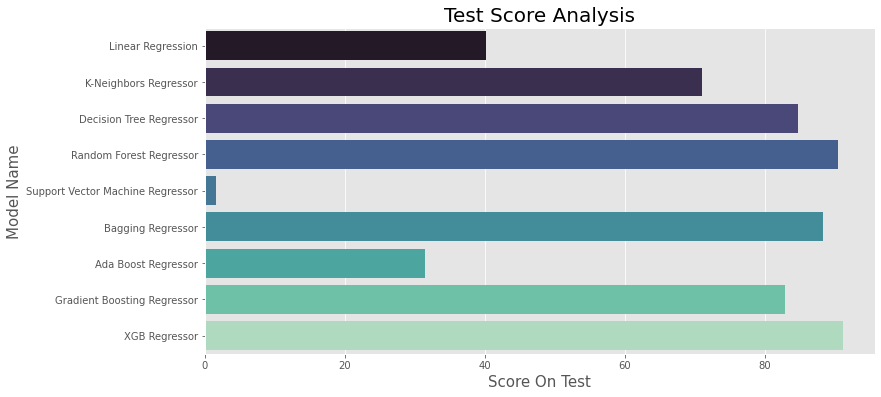

In [131]:
plt.figure(figsize=(12,6))
sns.barplot('Score On Test','Name Of Model',data=all_score,palette = "mako")
plt.xlabel('Score On Test',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'RMSE Score Analysis')

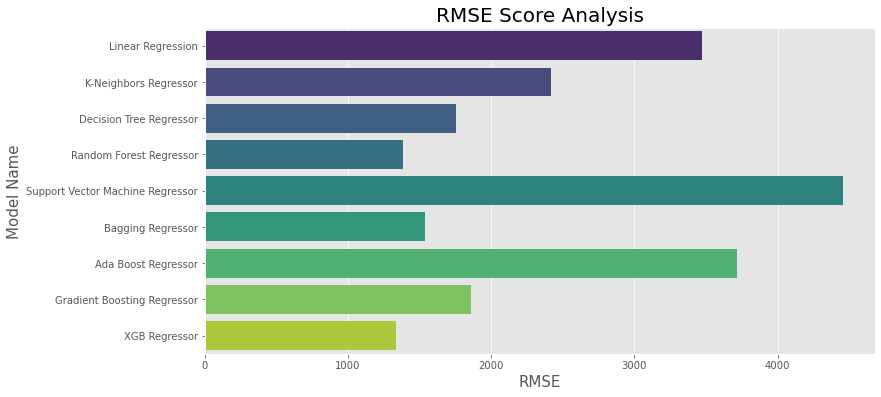

In [132]:
plt.figure(figsize=(12,6))
sns.barplot('RMSE','Name Of Model',data=all_score,palette = "viridis")
plt.xlabel('RMSE',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('RMSE Score Analysis',fontsize=20)

Text(0.5, 1.0, 'CV Score Analysis')

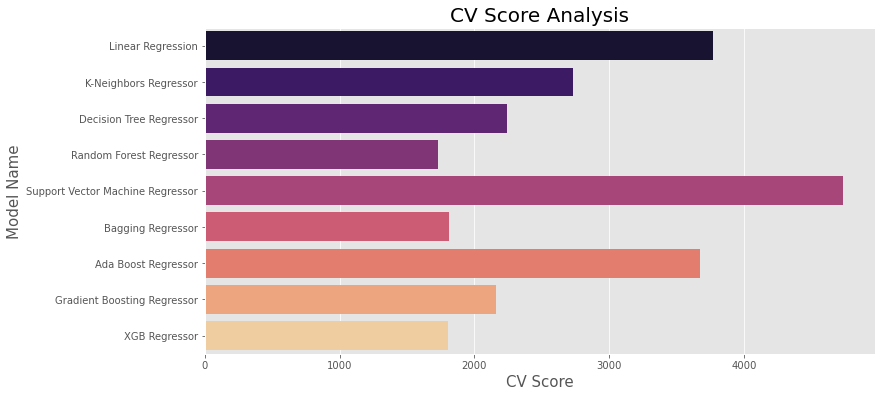

In [133]:
plt.figure(figsize=(12,6))
sns.barplot('CV Score','Name Of Model',data=all_score,palette = "magma")
plt.xlabel('CV Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('CV Score Analysis',fontsize=20)

Text(0.5, 1.0, 'R2 Score Analysis')

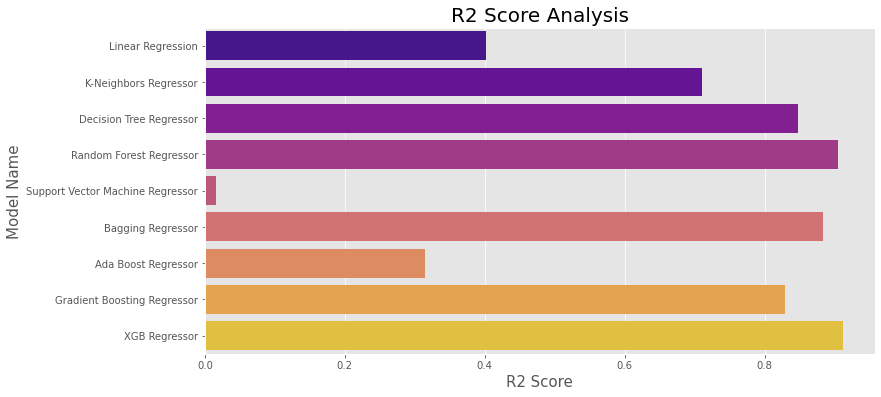

In [134]:
plt.figure(figsize=(12,6))
sns.barplot('R2 Score','Name Of Model',data=all_score,palette = "plasma")
plt.xlabel('R2 Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('R2 Score Analysis',fontsize=20)

### 15. Hyperparameter tunning on XGB regressor using GridSearch CV

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
clf = xb.XGBRegressor()
param = {'n_estimators':[100,150,200],
         'learning_rate' : [0.1,0.01,0.8],
         'max_depth' : [3,5,7,10],
         'subsample' : [0.1,0.5,0.9,1] 
         }

grd = GridSearchCV(clf,param_grid=param,scoring='neg_mean_squared_error',cv=10)
grd.fit(X_train,y_train)


clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Best parameter",grd.best_params_)
print("r2 score after hyper parameter tunning",r2_score(y_test,y_pred))

Best parameter {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.5}
r2 score after hyper parameter tunning 0.910383810262537


##### Outcome : After hyperparameter tunning i am not able to improve r2 score. So default parameter give me best result.

### 16. Saving the model

In [137]:
import pickle

In [138]:
final_result = 'Flight Price Prediction.pickle'
pickle.dump(xr,open(final_result,'wb'))

## Test Data

### 1. Import data set, create data frame and display first five row

In [139]:
df_test = pd.read_excel(r'E:/DATA TRAINED/Data/Project Data/DSData-master/DSData-master/Flight Price Prediction/Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### 2. Explore Data Frame

#### a). Data frame shape

In [140]:
df_test.shape

(2671, 10)

##### Outcome : There are total 2671 rows and 10 column in the data frame

#### b). Data frame info

In [141]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


##### Outcome :
* All columns in the data frame are type of object. The columns are : Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info.
* There is no null value.

#### c). Cross checking the null values

In [142]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

##### Outcome : There is no null value

#### d). Checking the uniqueness of value in each column

In [143]:
df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

##### Outcome : Above are the count of unique values in each column

#### e). Checking the value in each column

In [144]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [145]:
df_test['Date_of_Journey'].value_counts()

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
3/04/2019      28
06/03/2019     28
3/05/2019      27
03/03/2019     26
21/06/2019     24
9/04/2019      24
15/04/2019     23
18/06/2019     22
21/04/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
1/03/2019      12
18/04/2019     12
12/04/2019     11
Name: Date_of_Journey, dtype: int64

In [146]:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [147]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [148]:
df_test['Route'].value_counts()

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
CCU → BBI → IXR → DEL → BLR      1
BOM → IXC → DEL → HYD            1
BLR → VGA → HYD → DEL            1
BLR → BOM → JDH → DEL            1
CCU → DEL → COK → TRV → BLR      1
Name: Route, Length: 100, dtype: int64

In [149]:
df_test['Dep_Time'].value_counts()

10:00    62
18:55    55
20:00    53
14:05    51
17:00    48
         ..
15:35     1
22:30     1
01:35     1
16:35     1
13:50     1
Name: Dep_Time, Length: 199, dtype: int64

In [150]:
df_test['Arrival_Time'].value_counts()

19:00           113
21:00           106
19:15           101
12:35            37
16:10            31
               ... 
00:25 22 Mar      1
09:25 25 Jun      1
11:25 02 Mar      1
09:45 25 May      1
01:00 10 May      1
Name: Arrival_Time, Length: 704, dtype: int64

In [151]:
df_test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
31h 10m      1
19h 15m      1
5m           1
32h 5m       1
27h 50m      1
Name: Duration, Length: 320, dtype: int64

In [152]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [153]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

### 3. Data Processing

#### a). Feature Extraction

In [154]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

##### Decision :
* I am going to convert Date_of_Journey,Arrival_Time,Dep_Time into datetime i.e. timestamp.
* From Date_of_Journey i am extracting day,month & year in separate column.
* Based on Arrival_Time,Dep_Time i am calculating the duration by taking the difference which give me output data as timedelta. After obtaining timedelta i will obtain data in seconds then convert these second into mintues by dividing 60,then convert it into hour by again dividing 60 or simply divide seconds by 3600.
Then replace the final result into Duration.
* From Arrival_Time,Dep_Time i am extracting Hour & Minute in separate column.

In [155]:
# Converting the data type
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'])
df_test['Arrival_Time'] = pd.to_datetime(df_test['Arrival_Time'])
df_test['Dep_Time'] = pd.to_datetime(df_test['Dep_Time'])

In [156]:
# Extracting Day,Month & Year from Date_of_Journey

# Extracting Day
df_test['Journey_Day'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%y/').dt.day

# Extracting Month
df_test['Journey_Month'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%y/').dt.month

# Extracting Year
df_test['Journey_Year'] = pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%y/').dt.year

In [157]:
# Dropping Date_of_Journey column
df_test.drop(columns='Date_of_Journey',axis=1,inplace=True)

In [158]:
# Dealing for Duration
test_time_delta = (df_test['Arrival_Time']-df_test['Dep_Time'])
test_time_delta_difference = []
for i in range(len(test_time_delta)):
    test_final_duration = test_time_delta.iloc[i].seconds/3600
    test_time_delta_difference.append(test_final_duration)

# Replacing the 'Duration' by result
df_test['Duration'] = test_time_delta_difference

In [159]:
# Extracting hours and minutes from 'Arrival_Time'

# Extracting hours 
df_test['Arrival_Hours'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour

# Extracting minutes
df_test['Arrival_Minutes'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [160]:
# Extracting hours and minutes from 'Dep_Time'

# Extracting hours 
df_test['Dep_Hours'] = pd.to_datetime(df_test['Dep_Time']).dt.hour

# Extracting minutes
df_test['Dep_Minutes'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

In [161]:
# Dropping Arrival_Time & Dep_Time
df_test.drop(columns=['Arrival_Time','Dep_Time'],axis=1,inplace=True)

#### b). Dealing for grouping

In [162]:
# Dealing in Airline
df_test['Airline'] = df_test['Airline'].replace('Jet Airways Business','Jet Airways') 
df_test['Airline'] = df_test['Airline'].replace('Multiple carriers Premium economy','Multiple carriers')
df_test['Airline'] = df_test['Airline'].replace('Vistara Premium economy','Vistara')

In [163]:
# Dealing in Destination
df_test['Destination'] = df_test['Destination'].replace('New Delhi','Delhi') 

In [164]:
# Dealing in Additional_Info 
df_test['Additional_Info'] = df_test['Additional_Info'].replace('No Info','No info')
df_test['Additional_Info'] = df_test['Additional_Info'].replace('1 Long layover','Long layover')
df_test['Additional_Info'] = df_test['Additional_Info'].replace('2 Long layover','Long layover')

In [165]:
# Dropping extra column
df_test.drop(columns='Journey_Year',axis=1,inplace=True)

### 4. Descriptive Statical Data

In [166]:
df_test.describe()

,Duration,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,8.308187,12.026956,5.607263,13.585174,24.558218,12.603519,24.891426
std,6.331450,8.564408,3.042952,7.040396,16.775436,5.686673,19.086522
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.833333,5.000000,3.000000,8.000000,10.000000,8.000000,5.000000
50%,6.500000,6.000000,5.000000,15.000000,25.000000,12.000000,25.000000
75%,12.583333,21.000000,6.000000,19.000000,35.000000,18.000000,45.000000
max,23.916667,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


##### Outcome :
* Difference between mean and 50 % show the skew data.
* Hudge difference between 75% and max show the outier's. 

### 5. Features Engineering

In [167]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          2671 non-null   object 
 1   Source           2671 non-null   object 
 2   Destination      2671 non-null   object 
 3   Route            2671 non-null   object 
 4   Duration         2671 non-null   float64
 5   Total_Stops      2671 non-null   object 
 6   Additional_Info  2671 non-null   object 
 7   Journey_Day      2671 non-null   int64  
 8   Journey_Month    2671 non-null   int64  
 9   Arrival_Hours    2671 non-null   int64  
 10  Arrival_Minutes  2671 non-null   int64  
 11  Dep_Hours        2671 non-null   int64  
 12  Dep_Minutes      2671 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 271.4+ KB


#### a). Dealing with outliers

In [168]:
df_test1 = df_test.select_dtypes(exclude='object')

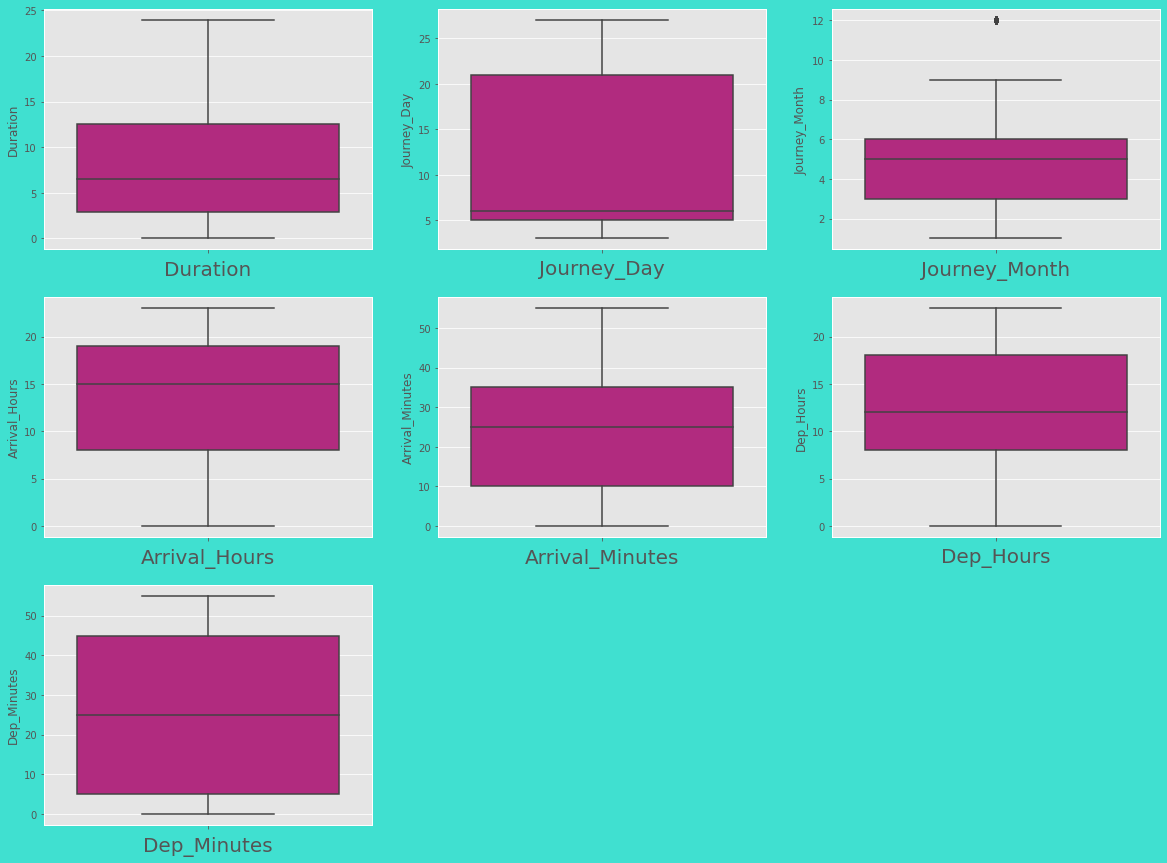

In [169]:
plt.figure(figsize=(20,15),facecolor='Turquoise')
plt.style.use('ggplot')
plot_no = 1
for column in df_test1:
    if plot_no<=8:
        ax = plt.subplot(3,3,plot_no)
        sns.boxplot(y=df_test1[column],color='MediumVioletRed')
        plt.xlabel(column,fontsize=20)
    plot_no+=1
plt.show() 

In [170]:
# finding the outliers

# 1st quantile
q1 = df_test.quantile(0.25) 

# 3rd quantile
q3 = df_test.quantile(0.75)

#IQR
iqr = q3-q1

In [171]:
# Deal with 'Journey_Month' outliers

# finding the High outliers
test_pre_high = q3.Journey_Month + (1.5 * iqr.Journey_Month)
print('The Higher Outliers For Journey_Month is :',test_pre_high)

# finding the index of these above the value
test_pre_high_index = np.where(df_test['Journey_Month']>test_pre_high)
print('The index are :',test_pre_high_index)

# Drop these index from data frame
df_test_o = df_test.drop(df_test.index[test_pre_high_index])

df_test_o.reset_index(drop=True)

The Higher Outliers For Journey_Month is : 10.5
The index are : (array([   1,    5,    6,   13,   18,   19,   33,   40,   50,   60,   68,
        105,  121,  135,  143,  147,  158,  159,  193,  207,  226,  237,
        259,  271,  291,  294,  296,  323,  337,  342,  348,  353,  366,
        370,  374,  376,  389,  409,  410,  413,  435,  475,  477,  479,
        487,  491,  499,  505,  507,  518,  563,  566,  598,  600,  604,
        608,  612,  626,  631,  634,  668,  674,  675,  682,  701,  707,
        731,  733,  738,  745,  748,  753,  755,  759,  762,  768,  777,
        794,  795,  807,  809,  811,  822,  823,  830,  833,  840,  851,
        853,  857,  866,  877,  888,  889,  891,  895,  899,  905,  912,
        921,  940,  942,  963,  974,  975,  988, 1007, 1021, 1035, 1041,
       1058, 1062, 1071, 1086, 1102, 1124, 1127, 1137, 1138, 1152, 1154,
       1159, 1160, 1172, 1186, 1204, 1223, 1236, 1239, 1250, 1257, 1263,
       1275, 1303, 1308, 1321, 1322, 1324, 1335, 1336, 1339

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,6,6,4,25,17,30
1,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,21,5,19,0,19,15
2,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,21,5,21,0,8,0
3,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,24,6,2,45,23,55
4,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,5.250000,1 stop,No info,5,1,20,30,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,Air India,Kolkata,Banglore,CCU → DEL → BLR,23.916667,1 stop,No info,6,6,20,25,20,30
2410,IndiGo,Kolkata,Banglore,CCU → BLR,2.583333,non-stop,No info,27,3,16,55,14,20
2411,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6.583333,1 stop,No info,3,6,4,25,21,50
2412,Air India,Delhi,Cochin,DEL → BOM → COK,15.250000,1 stop,No info,3,6,19,15,4,0


In [172]:
print('Before ouliers remove the shape is :',df_test.shape)
print('Now the shape is :',df_test_o.shape)    
print('The loss of data in percentage is :',(df_test.shape[0]-df_test_o.shape[0])/df_test.shape[0]*100)

Before ouliers remove the shape is : (2671, 13)
Now the shape is : (2414, 13)
The loss of data in percentage is : 9.621864470235867


#### b). Dealing with skewness

In [173]:
df_test_o.skew()

Duration           0.812134
Journey_Day        0.310730
Journey_Month      0.156564
Arrival_Hours     -0.444721
Arrival_Minutes    0.096564
Dep_Hours          0.107732
Dep_Minutes        0.126943
dtype: float64

In [174]:
test_test = ['Duration']

In [175]:
df_test_o[test_test] = pt.fit_transform(df_test_o[test_test].values)

In [176]:
df_test_o.skew()

Duration          -0.013380
Journey_Day        0.310730
Journey_Month      0.156564
Arrival_Hours     -0.444721
Arrival_Minutes    0.096564
Dep_Hours          0.107732
Dep_Minutes        0.126943
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

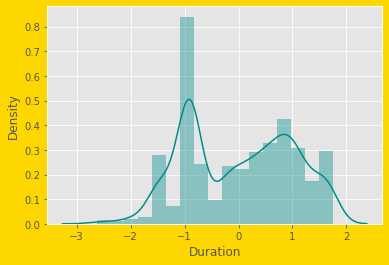

In [177]:
plt.figure(facecolor='Gold')
sns.distplot(df_test_o['Duration'],color='DarkCyan')

#### c).  Encoding the categorical column using Label Encoder

In [178]:
df_test_o['Airline'] = lb.fit_transform(df_test_o['Airline'])
df_test_o['Source'] = lb.fit_transform(df_test_o['Source'])
df_test_o['Destination'] = lb.fit_transform(df_test_o['Destination'])
df_test_o['Route'] = lb.fit_transform(df_test_o['Route'])
df_test_o['Total_Stops'] = lb.fit_transform(df_test_o['Total_Stops'])
df_test_o['Additional_Info'] = lb.fit_transform(df_test_o['Additional_Info'])

### 6. Correlation matrix to see the coffecient of multicolinearity

#### a). Visualize by matrix

In [179]:
df_test_corr = df_test_o.corr().abs()
df_test_corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
Airline,1.000000,0.025743,0.073316,0.006619,0.055145,0.021399,0.149410,0.007439,0.002283,0.015035,0.108238,0.009846,0.059759
Source,0.025743,1.000000,0.389236,0.330589,0.051402,0.213583,0.036250,0.025131,0.044850,0.003893,0.022964,0.069805,0.049378
Destination,0.073316,0.389236,1.000000,0.229631,0.406966,0.516335,0.083267,0.020449,0.050412,0.035278,0.020444,0.071824,0.104231
Route,0.006619,0.330589,0.229631,1.000000,0.360363,0.472894,0.040619,0.040341,0.129223,0.000204,0.225181,0.123306,0.036332
Duration,0.055145,0.051402,0.406966,0.360363,1.000000,0.687077,0.121802,0.052472,0.066728,0.013730,0.167460,0.082031,0.036776
Total_Stops,0.021399,0.213583,0.516335,0.472894,0.687077,1.000000,0.144370,0.070942,0.063200,0.087280,0.194468,0.074280,0.065824
Additional_Info,0.149410,0.036250,0.083267,0.040619,0.121802,0.144370,1.000000,0.041788,0.033281,0.011078,0.022466,0.062081,0.019532
Journey_Day,0.007439,0.025131,0.020449,0.040341,0.052472,0.070942,0.041788,1.000000,0.111535,0.017975,0.017399,0.011166,0.021626
Journey_Month,0.002283,0.044850,0.050412,0.129223,0.066728,0.063200,0.033281,0.111535,1.000000,0.010870,0.026181,0.029400,0.009782
Arrival_Hours,0.015035,0.003893,0.035278,0.000204,0.013730,0.087280,0.011078,0.017975,0.010870,1.000000,0.136125,0.000559,0.050686


#### b). Visualize by heatmap

<AxesSubplot:>

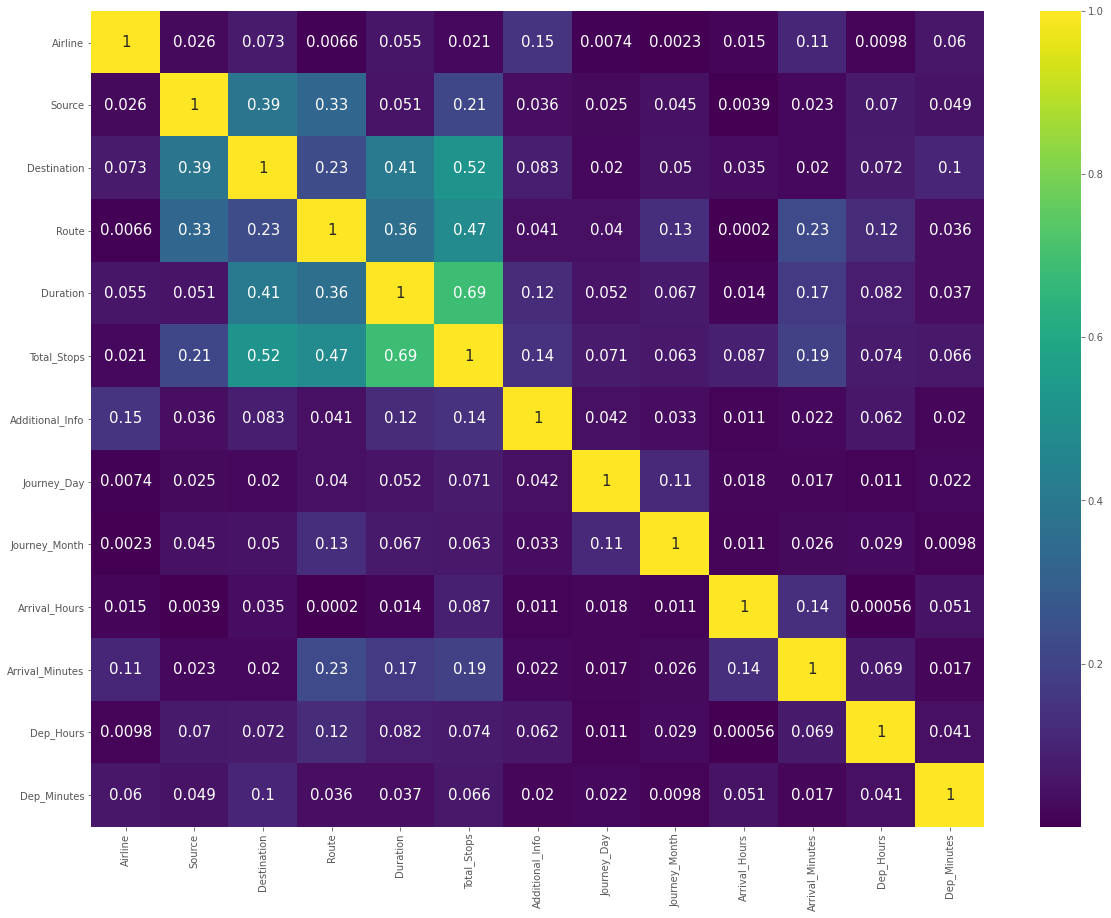

In [180]:
plt.figure(figsize=(20,15))
sns.heatmap(df_test_corr,annot=True,annot_kws={'size':15},cmap='viridis')

### 7. Scaling the data set using Standard Scaler

In [181]:
X_test_scaled = ss.fit_transform(df_test_o)

### 8. Load the model 

In [182]:
finalize_model = open('Flight Price Prediction.pickle','rb')
xb = pickle.load(finalize_model)

In [183]:
train_prediction = xb.predict(X_test)
train_prediction

array([11112.551 , 11011.575 ,  8551.976 , ..., 11260.484 ,  5661.8037,
        6085.452 ], dtype=float32)

In [184]:
# Now predicted fligh price on given test data set
predicted_test_flightprice = xb.predict(df_test_o)
predicted_test_flightprice

array([10507.428,  7249.765, 10003.211, ..., 13211.401,  8731.779,
       10311.222], dtype=float32)

In [185]:
pd.DataFrame([xb.predict(X_test)[:],y_test[:]],index=['Predicted Price','Actual Price'])

,0,1,2,3,4,5,6,7,8,9,...,3200,3201,3202,3203,3204,3205,3206,3207,3208,3209
Predicted Price,11112.550781,11011.575195,8551.975586,11888.202148,3953.030029,10155.144531,10873.584961,14497.666992,5662.209961,12055.760742,...,5370.441895,2365.11377,7969.303711,11678.146484,4445.452148,4969.118164,4984.77002,11260.484375,5661.803711,6085.452148
Actual Price,10262.000000,8327.000000,8888.000000,13587.000000,4049.000000,10037.000000,6315.000000,14714.000000,7166.000000,12273.000000,...,5406.000000,2227.00000,8372.000000,12898.000000,3943.000000,4823.000000,4462.00000,10262.000000,5947.000000,6094.000000


In [186]:
test_flight_price_prediction = pd.DataFrame()
test_flight_price_prediction['Predicted Price'] = predicted_test_flightprice

In [187]:
test_flight_price_prediction

,Predicted Price
0,10507.427734
1,7249.765137
2,10003.210938
3,6395.627441
4,9184.515625
...,...
2409,10923.793945
2410,10674.863281
2411,13211.401367
2412,8731.779297


In [188]:
test_flight_price_prediction.to_excel('Fligh Price Predicted On Test.xlsx')